# Proyecto Contaminación

# Dynamic Time Wraping (DTW) para la comparación del curso de contaminantes y egresos

# Contaminante NOX

# (Año 2010)

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

timestamp         NOX
0       1993-01-01 00:00:00    6.750000
1       1993-01-01 00:00:00    8.500000
2       1993-01-01 00:00:00   11.000000
3       1993-01-01 00:00:00   17.500000
4       1993-01-01 01:00:00    4.000000
...                     ...         ...
1128925 2018-12-31 23:00:00   74.400002
1128926 2018-12-31 23:00:00  207.000000
1128927 2018-12-31 23:00:00   27.000000
1128928 2018-12-31 23:00:00   70.099998
1128929 2018-12-31 23:00:00  185.100006

[1128930 rows x 2 columns]

In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

timestamp         NOX
0        1993-01-01 00    6.750000
1        1993-01-01 00    8.500000
2        1993-01-01 00   11.000000
3        1993-01-01 00   17.500000
4        1993-01-01 01    4.000000
...                ...         ...
1128925  2018-12-31 23   74.400002
1128926  2018-12-31 23  207.000000
1128927  2018-12-31 23   27.000000
1128928  2018-12-31 23   70.099998
1128929  2018-12-31 23  185.100006

[1128930 rows x 2 columns]

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2010'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp       NOX
0      2010-01-01 00   11.1000
1      2010-01-01 00    0.0181
2      2010-01-01 00   11.7000
3      2010-01-01 00   10.6000
4      2010-01-01 00    3.9000
...              ...       ...
57434  2010-12-31 23   83.1000
57435  2010-12-31 23  156.3000
57436  2010-12-31 23   13.0000
57437  2010-12-31 23   44.9000
57438  2010-12-31 23   17.1000

[57439 rows x 2 columns]

In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp       NOX
0     2010-01-01 00:00:00   11.1000
1     2010-01-01 00:00:00    0.0181
2     2010-01-01 00:00:00   11.7000
3     2010-01-01 00:00:00   10.6000
4     2010-01-01 00:00:00    3.9000
...                   ...       ...
57434 2010-12-31 23:00:00   83.1000
57435 2010-12-31 23:00:00  156.3000
57436 2010-12-31 23:00:00   13.0000
57437 2010-12-31 23:00:00   44.9000
57438 2010-12-31 23:00:00   17.1000

[57439 rows x 2 columns]

In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp       NOX  sem
0     2010-01-01 00:00:00   11.1000   52
1     2010-01-01 00:00:00    0.0181   52
2     2010-01-01 00:00:00   11.7000   52
3     2010-01-01 00:00:00   10.6000   52
4     2010-01-01 00:00:00    3.9000   52
...                   ...       ...  ...
57434 2010-12-31 23:00:00   83.1000   52
57435 2010-12-31 23:00:00  156.3000   52
57436 2010-12-31 23:00:00   13.0000   52
57437 2010-12-31 23:00:00   44.9000   52
57438 2010-12-31 23:00:00   17.1000   52

[57439 rows x 3 columns]

In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        19/01/2010     O829
1        16/02/2010     J189
2        23/03/2010     N814
3        17/04/2010     O759
4        22/05/2010     K359
...             ...      ...
2634334  21/07/2010     O064
2634335  21/05/2010     S822
2634336  23/03/2010     K802
2634337  17/08/2010     O809
2634338  21/12/2010     C629

[2634339 rows x 2 columns]

In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2010-01-19     O829    3
1       2010-02-16     J189    7
2       2010-03-23     N814   12
3       2010-04-17     O759   15
4       2010-05-22     K359   20
...            ...      ...  ...
2597279 2010-07-21     O064   29
2597280 2010-05-21     S822   20
2597281 2010-03-23     K802   12
2597282 2010-08-17     O809   33
2597283 2010-12-21     C629   51

[2597284 rows x 3 columns]

In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     43463
2     48020
3     49300
4     50404
5     46716
6     50279
7     49462
8     50102
9     51123
10    52219
11    48527
12    51158
13    46652
14    48200
15    49187
16    49499
17    51348
18    48072
19    50004
20    50627
21    51101
22    51157
23    51436
24    49970
25    49757
26    49682
27    50141
28    50981
29    50164
30    50925
31    51991
32    52355
33    52240
34    53192
35    54220
36    55165
37    48947
38    54466
39    54926
40    54540
41    54019
42    54255
43    52924
44    47914
45    52907
46    50233
47    52802
48    51769
49    51864
50    51110
51    47295
52     8474
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  26.8096
1     2   31.127
2     3  50.2764
3     4  28.1342
4     5  38.5799
5     6  25.7618
6     7  29.7501
7     8  29.2651
8     9  20.1731
9    10  28.6186
10   11   22.776
11   12  27.3145
12   13  22.3243
13   14  22.2631
14   15  18.6523
15   16  27.6134
16   17  29.8153
17   18  27.4152
18   19  22.1844
19   20  20.4416
20   21   16.097
21   22  29.4649
22   23  20.0098
23   24  14.7789
24   25   15.831
25   26  16.7801
26   27  22.4931
27   28  16.0276
28   29  13.7639
29   30  19.0166
30   31  20.6235
31   32  19.7719
32   33  16.7304
33   34  23.2027
34   35  16.2704
35   36  17.7468
36   37  11.6998
37   38  13.6048
38   39  29.8043
39   40  21.7792
40   41  28.0028
41   42  21.2035
42   43  35.7876
43   44  39.2422
44   45  36.7876
45   46  44.2499
46   47  31.5757
47   48  56.8956
48   49  55.8892
49   50  51.5808
50   51  47.6048
51   52  42.2663


2010

NOX & O809


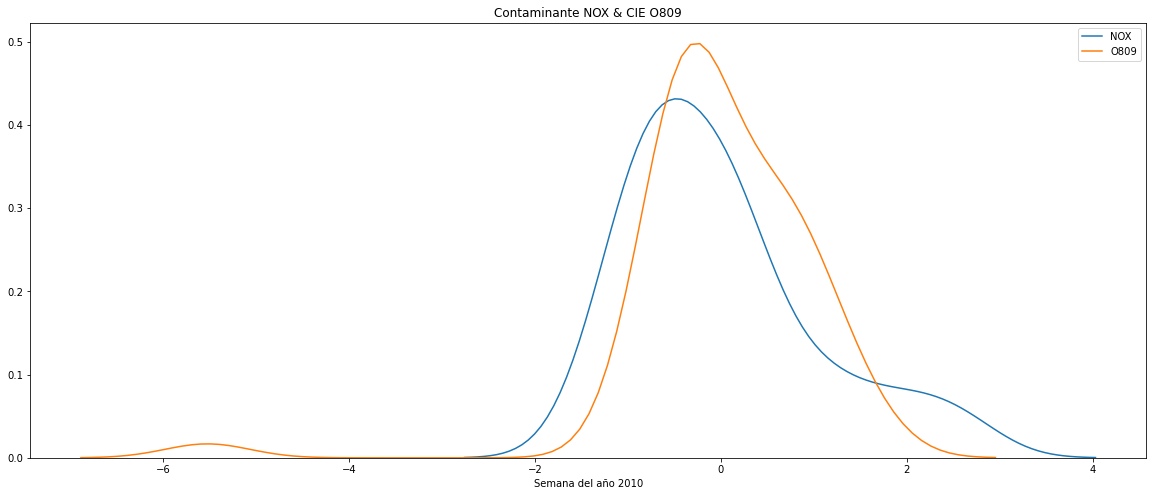


NOX & O829


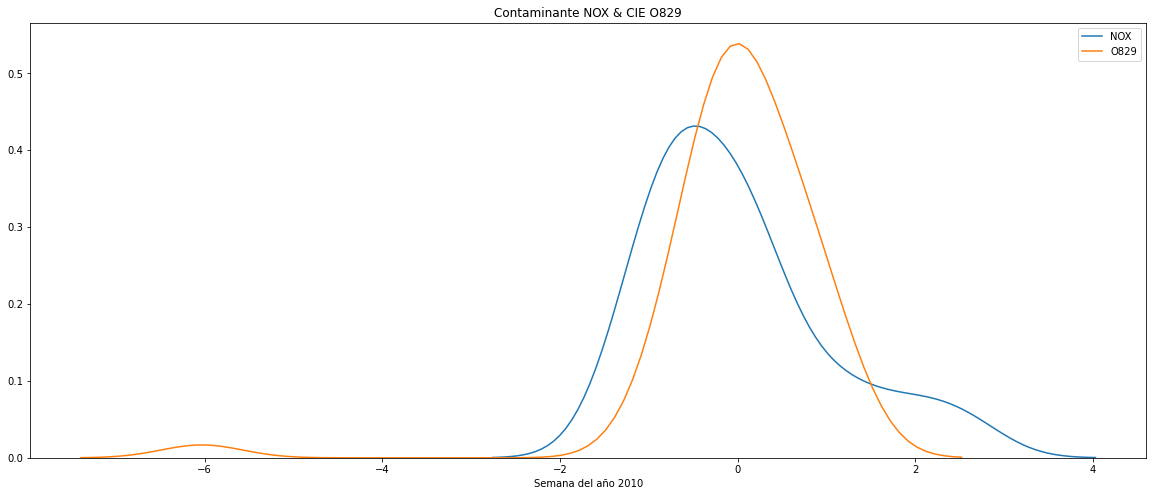


NOX & O800


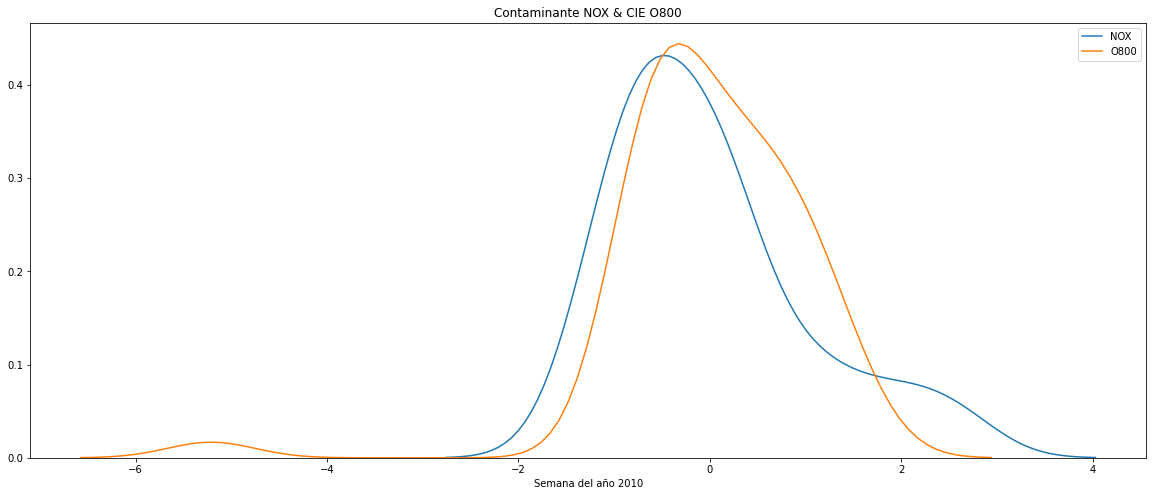


NOX & O064


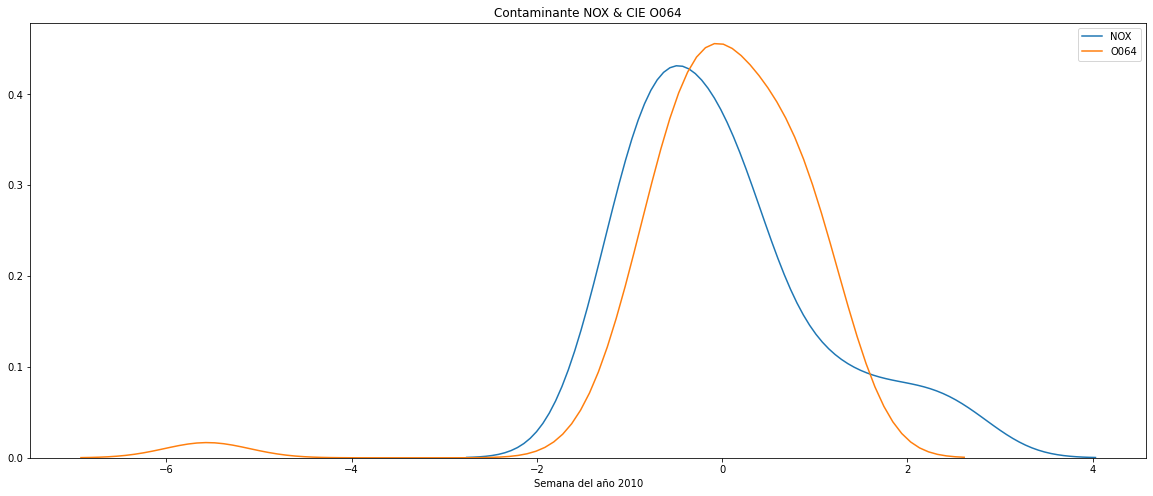


NOX & N189


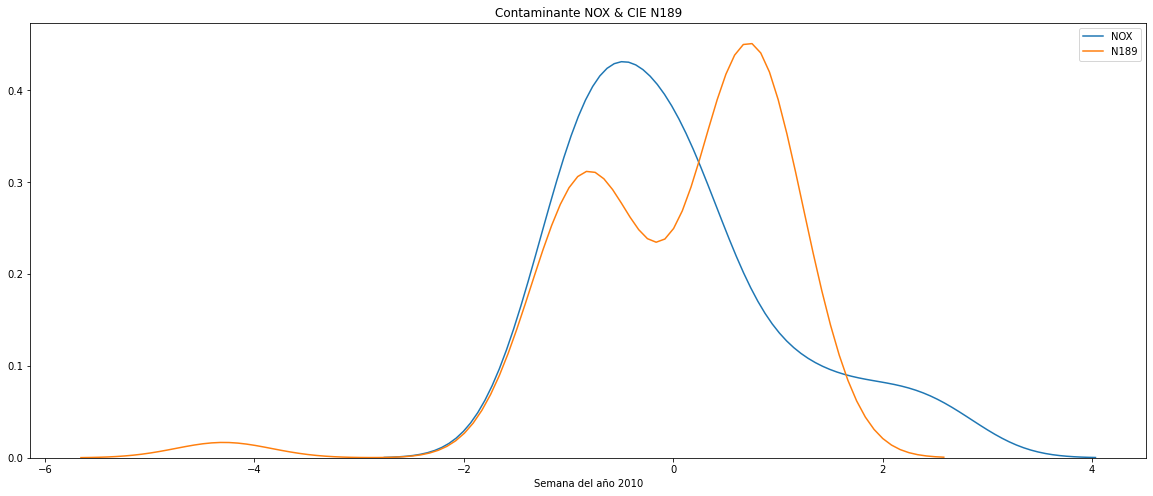


NOX & O342


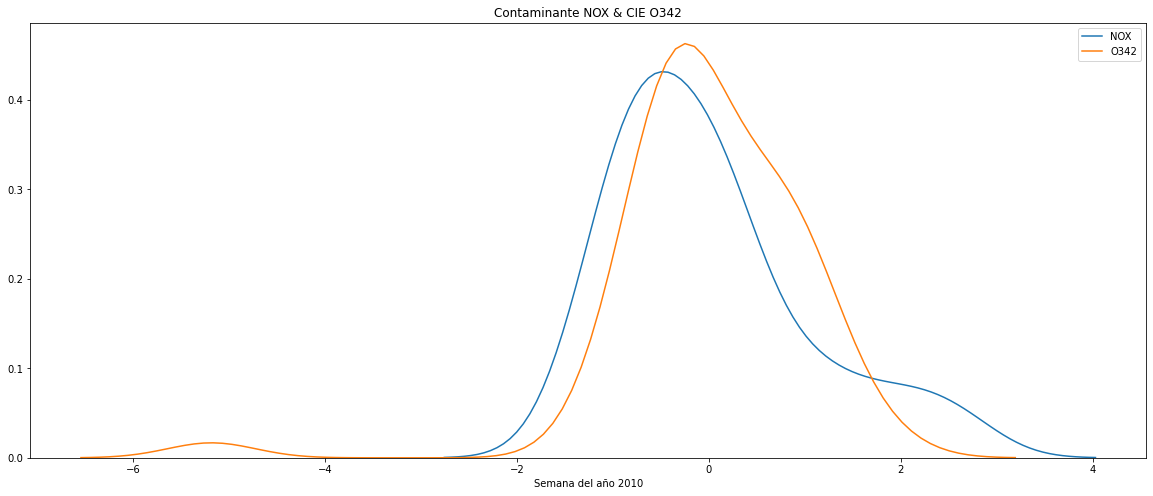


NOX & K359


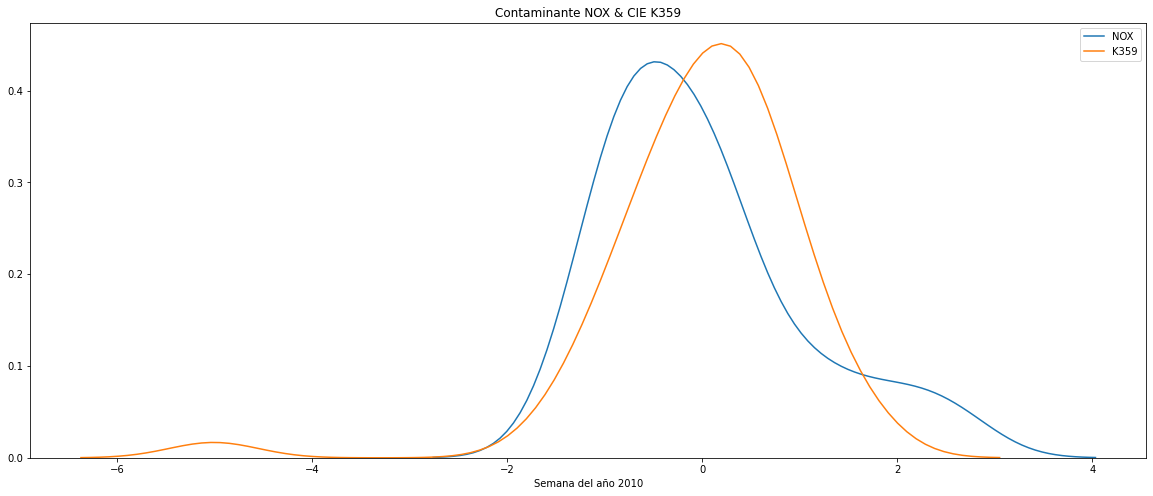


NOX & H


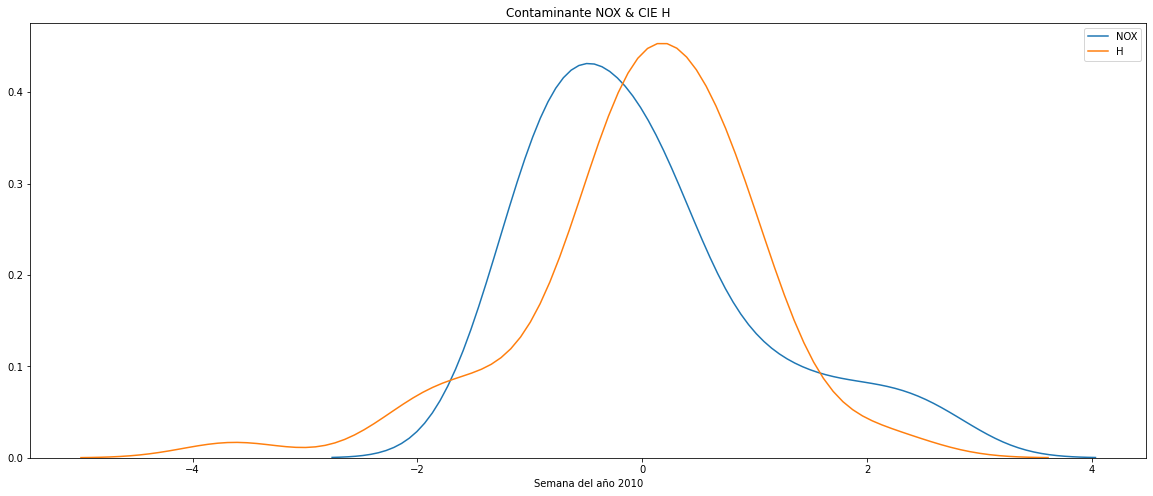


NOX & I


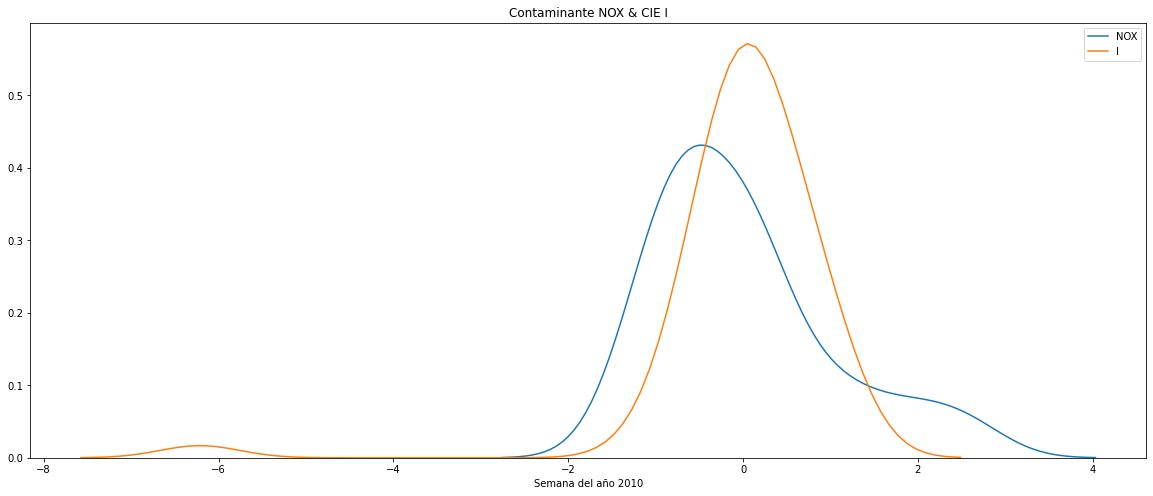


NOX & J


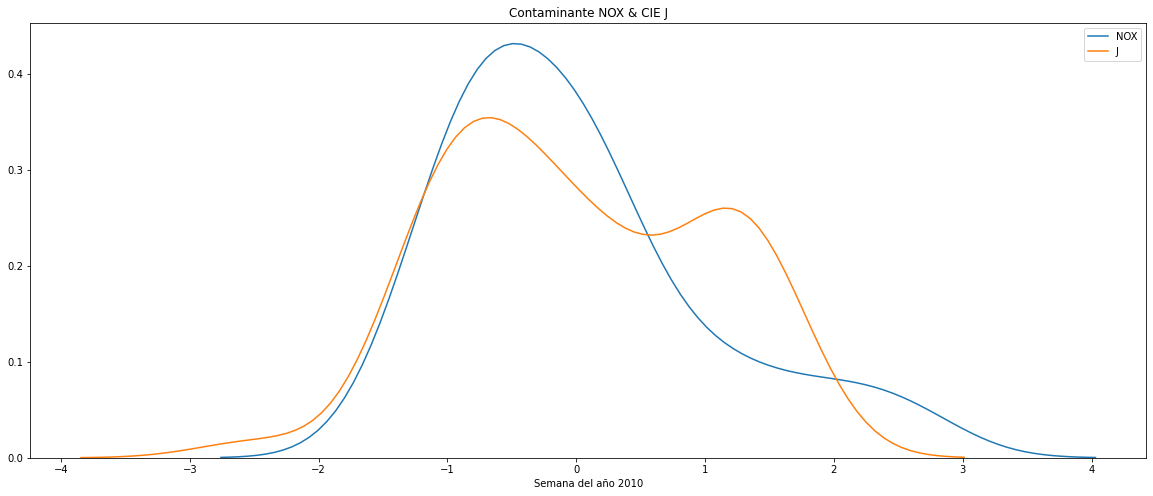

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2011)


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2011'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp    NOX
0      2011-01-01 00   73.4
1      2011-01-01 00   65.5
2      2011-01-01 00  126.4
3      2011-01-01 00  134.4
4      2011-01-01 00   12.3
...              ...    ...
64126  2011-12-31 23  136.0
64127  2011-12-31 23  262.7
64128  2011-12-31 23   44.5
64129  2011-12-31 23   28.5
64130  2011-12-31 23  355.2

[64131 rows x 2 columns]

In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp    NOX
0     2011-01-01 00:00:00   73.4
1     2011-01-01 00:00:00   65.5
2     2011-01-01 00:00:00  126.4
3     2011-01-01 00:00:00  134.4
4     2011-01-01 00:00:00   12.3
...                   ...    ...
64126 2011-12-31 23:00:00  136.0
64127 2011-12-31 23:00:00  262.7
64128 2011-12-31 23:00:00   44.5
64129 2011-12-31 23:00:00   28.5
64130 2011-12-31 23:00:00  355.2

[64131 rows x 2 columns]

In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp    NOX  sem
0     2011-01-01 00:00:00   73.4   52
1     2011-01-01 00:00:00   65.5   52
2     2011-01-01 00:00:00  126.4   52
3     2011-01-01 00:00:00  134.4   52
4     2011-01-01 00:00:00   12.3   52
...                   ...    ...  ...
64126 2011-12-31 23:00:00  136.0   52
64127 2011-12-31 23:00:00  262.7   52
64128 2011-12-31 23:00:00   44.5   52
64129 2011-12-31 23:00:00   28.5   52
64130 2011-12-31 23:00:00  355.2   52

[64131 rows x 3 columns]

In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        22/03/2011     T311
1        22/03/2011     K579
2        22/03/2011     L039
3        04/04/2011     K359
4        05/04/2011     J189
...             ...      ...
1048567  21/09/2011     I091
1048568  21/09/2011     I350
1048569  22/09/2011     I471
1048570  22/09/2011     I739
1048571  23/09/2011     I258

[1048559 rows x 2 columns]

In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2011-03-22     T311   12
1       2011-03-22     K579   12
2       2011-03-22     L039   12
3       2011-04-04     K359   14
4       2011-04-05     J189   14
...            ...      ...  ...
1032381 2011-09-21     I091   38
1032382 2011-09-21     I350   38
1032383 2011-09-22     I471   38
1032384 2011-09-22     I739   38
1032385 2011-09-23     I258   38

[1032386 rows x 3 columns]

In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17352
2     18696
3     19496
4     19507
5     19332
6     18294
7     19327
8     19752
9     19824
10    19289
11    19828
12    18756
13    19630
14    19820
15    19684
16    17260
17    18346
18    17878
19    18577
20    19349
21    19384
22    19016
23    19569
24    19636
25    19737
26    19807
27    19845
28    20238
29    20570
30    20463
31    20628
32    21214
33    21237
34    21296
35    21472
36    21765
37    20779
38    21674
39    23011
40    22644
41    22416
42    22546
43    22094
44    20010
45    22360
46    21769
47    21130
48    21236
49    20987
50    20903
51    19862
52     3091
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  43.0299
1     2  29.9452
2     3  51.8839
3     4  42.6818
4     5  34.5153
5     6   41.312
6     7  42.6081
7     8  29.5914
8     9  32.8652
9    10  29.6216
10   11  21.0583
11   12  21.9566
12   13  23.5924
13   14   25.621
14   15  23.3843
15   16  20.3606
16   17  27.0767
17   18  22.4777
18   19  20.1777
19   20  21.3174
20   21  20.2204
21   22  14.1358
22   23  18.4389
23   24  17.7433
24   25  18.6811
25   26  14.4292
26   27  10.7687
27   28  8.75766
28   29   12.076
29   30  9.84366
30   31  15.8616
31   32  16.0585
32   33  14.9774
33   34  17.6018
34   35  21.5858
35   36  24.7539
36   37   18.624
37   38  23.6754
38   39  25.1272
39   40  16.4633
40   41  28.2668
41   42  32.3067
42   43  26.1241
43   44  33.8771
44   45  29.6748
45   46  37.7213
46   47  28.6637
47   48   43.107
48   49  40.9451
49   50  43.4193
50   51  40.0753
51   52  64.1532


2011

NOX & O809


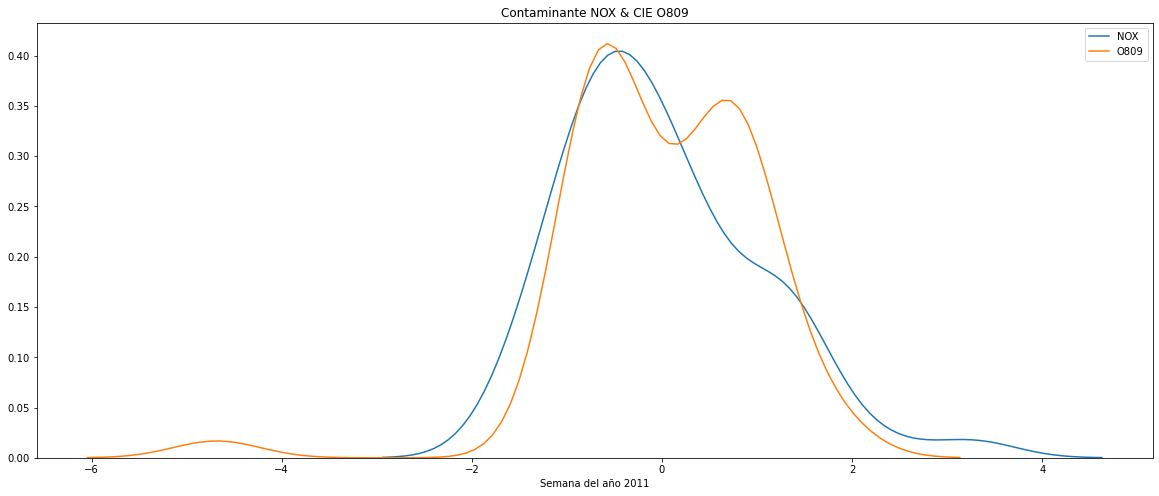


NOX & O800


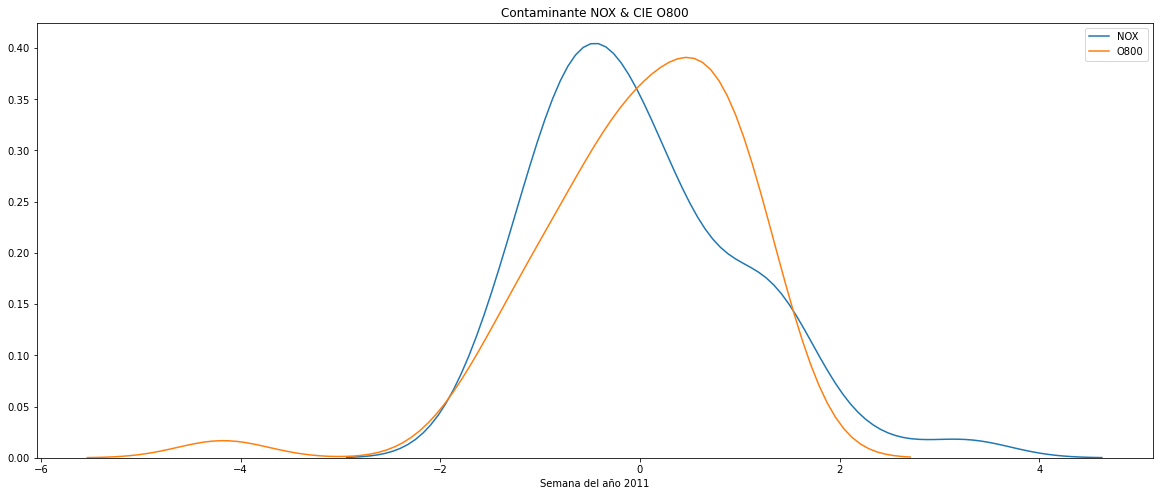


NOX & O064


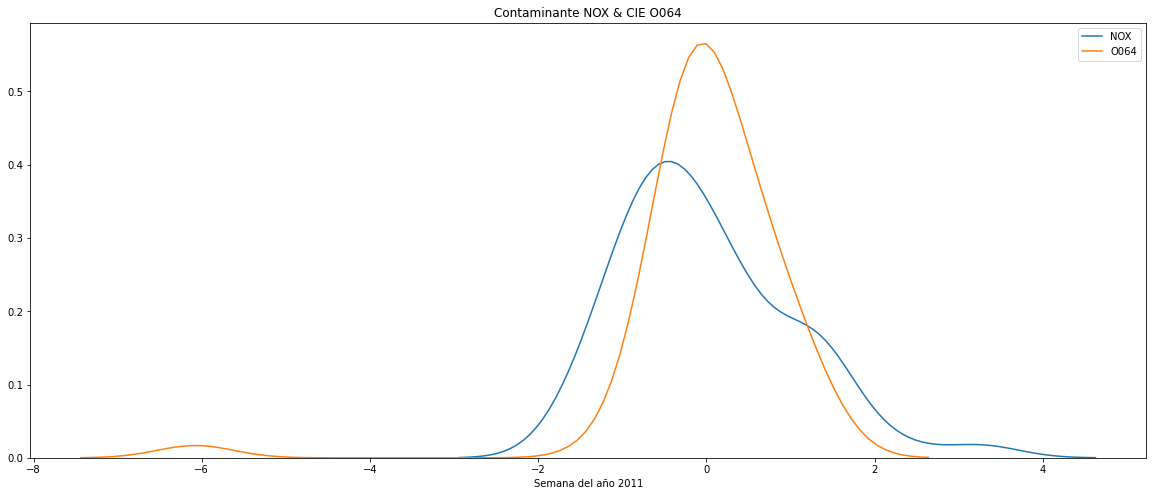


NOX & O342


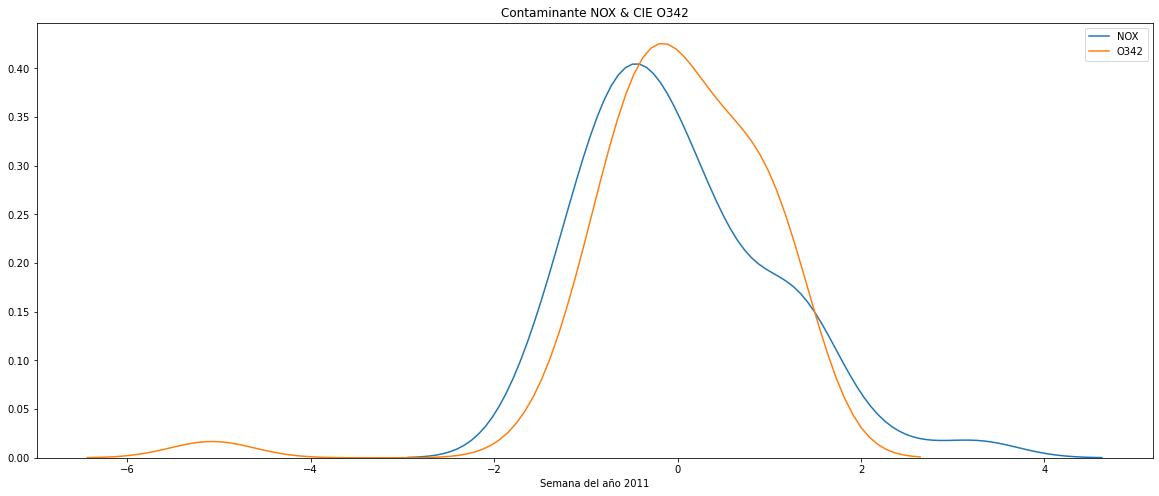


NOX & O829


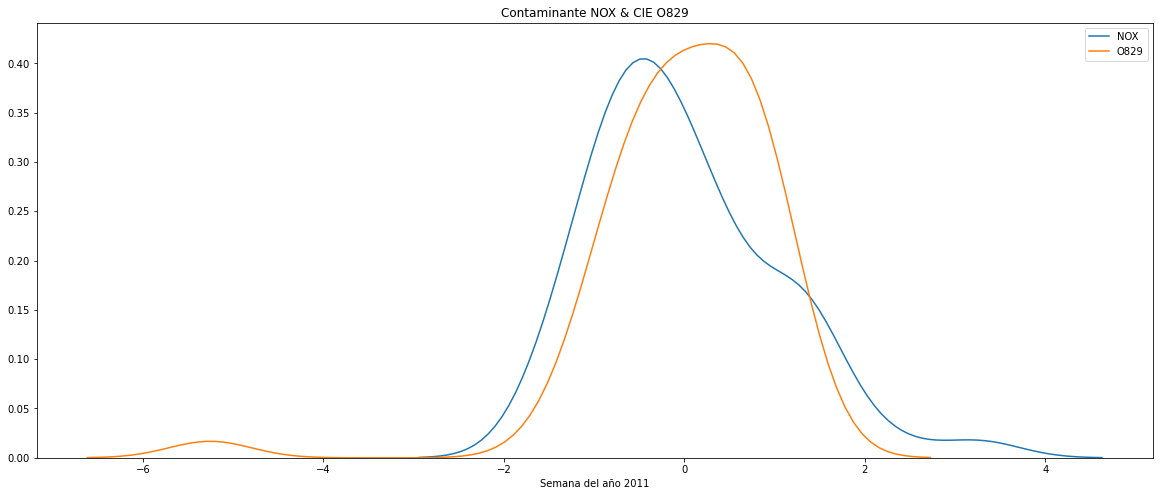


NOX & N189


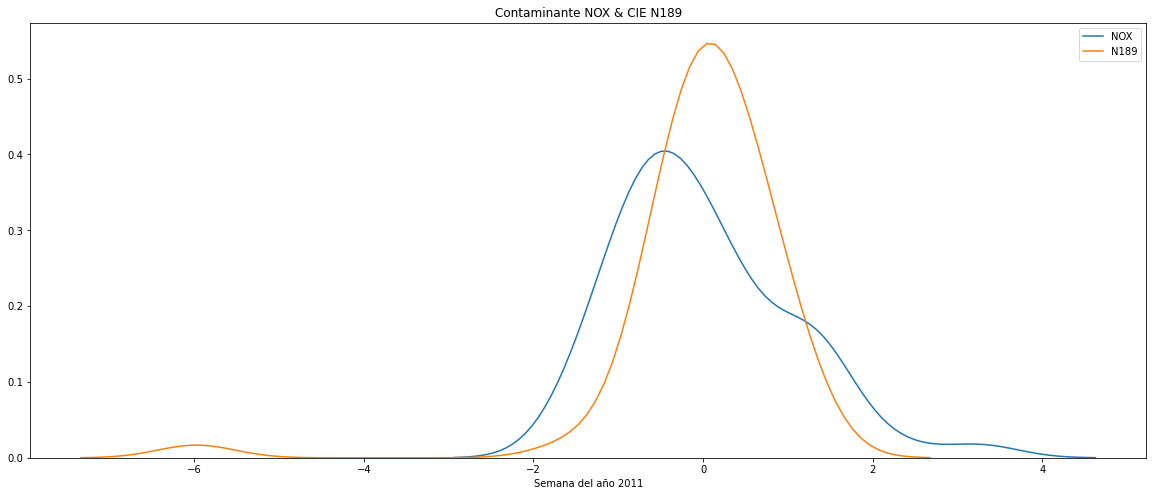


NOX & N180


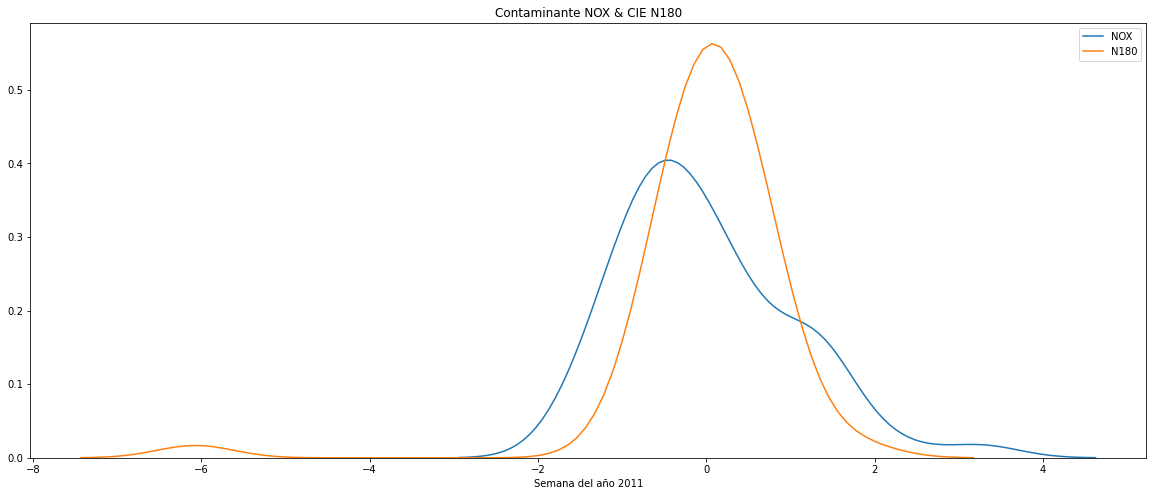


NOX & H


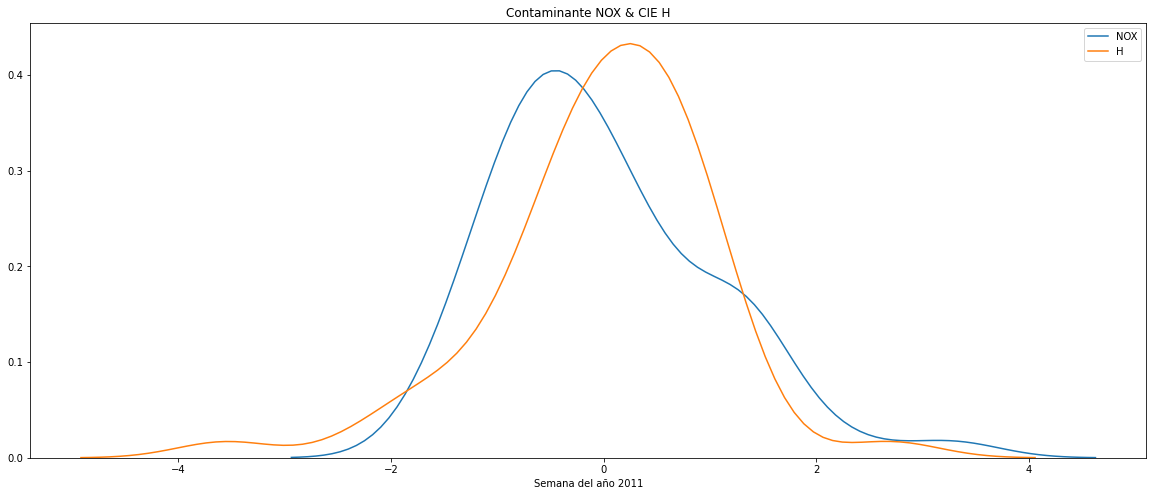


NOX & I


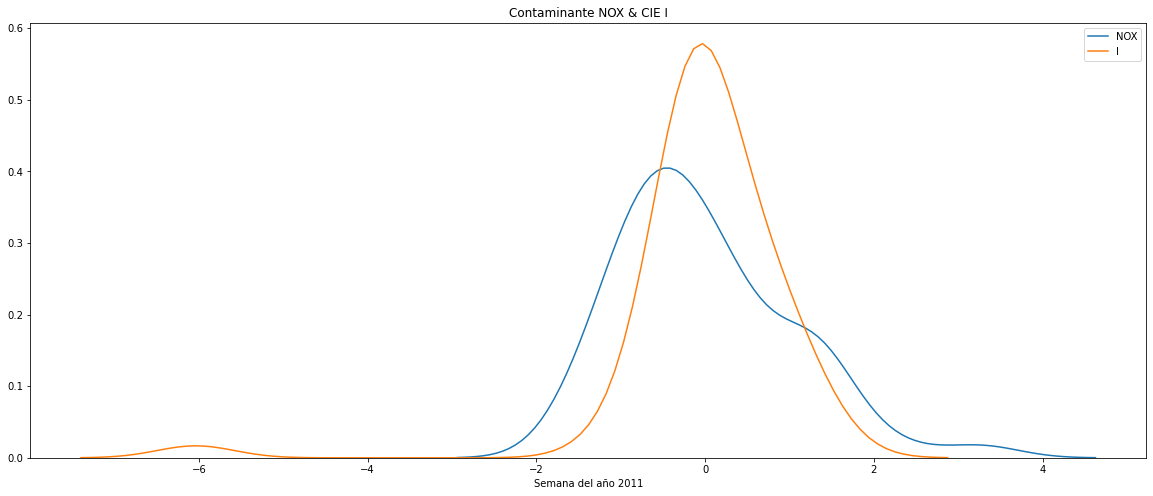


NOX & J


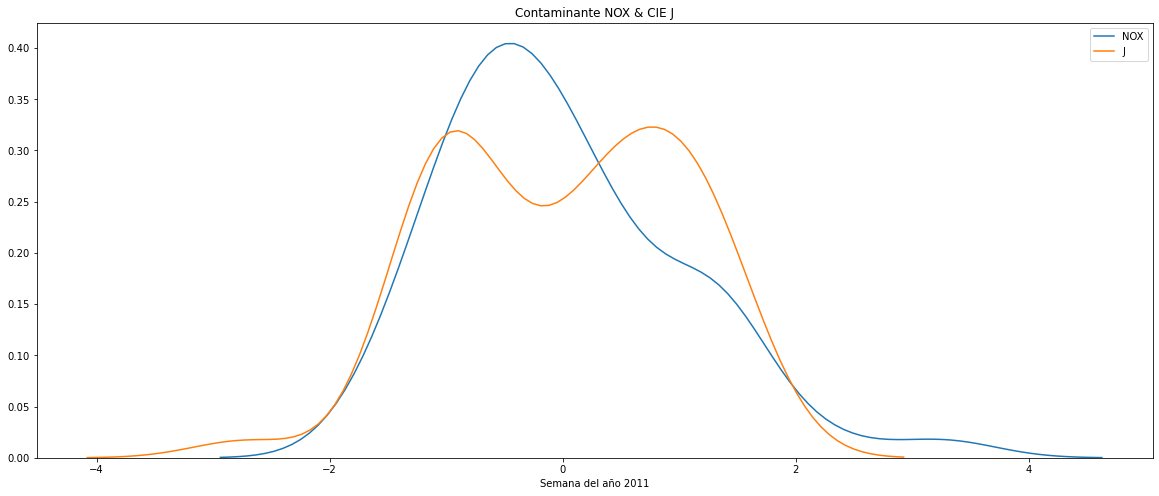

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2012)

In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2012'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp    NOX
0      2012-01-01 00   65.7
1      2012-01-01 00  300.0
2      2012-01-01 00   82.8
3      2012-01-01 00   74.4
4      2012-01-01 00  161.5
...              ...    ...
69698  2012-12-31 23  297.6
69699  2012-12-31 23   48.2
69700  2012-12-31 23   80.2
69701  2012-12-31 23   19.8
69702  2012-12-31 23  218.1

[69703 rows x 2 columns]

In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp    NOX
0     2012-01-01 00:00:00   65.7
1     2012-01-01 00:00:00  300.0
2     2012-01-01 00:00:00   82.8
3     2012-01-01 00:00:00   74.4
4     2012-01-01 00:00:00  161.5
...                   ...    ...
69698 2012-12-31 23:00:00  297.6
69699 2012-12-31 23:00:00   48.2
69700 2012-12-31 23:00:00   80.2
69701 2012-12-31 23:00:00   19.8
69702 2012-12-31 23:00:00  218.1

[69703 rows x 2 columns]

In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp    NOX  sem
0     2012-01-01 00:00:00   65.7    1
1     2012-01-01 00:00:00  300.0    1
2     2012-01-01 00:00:00   82.8    1
3     2012-01-01 00:00:00   74.4    1
4     2012-01-01 00:00:00  161.5    1
...                   ...    ...  ...
69698 2012-12-31 23:00:00  297.6    1
69699 2012-12-31 23:00:00   48.2    1
69700 2012-12-31 23:00:00   80.2    1
69701 2012-12-31 23:00:00   19.8    1
69702 2012-12-31 23:00:00  218.1    1

[69703 rows x 3 columns]

In [22]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        31/01/2012     N879
1        31/01/2012     O829
2        30/01/2012     O809
3        29/01/2012     O600
4        27/01/2012     O809
...             ...      ...
1048570  20/08/2012     C509
1048571  20/08/2012     C509
1048572  20/08/2012     C509
1048573  20/08/2012     C504
1048574  20/08/2012     C349

[1048553 rows x 2 columns]

In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2012-01-31     N879    5
1       2012-01-31     O829    5
2       2012-01-30     O809    5
3       2012-01-29     O600    5
4       2012-01-27     O809    4
...            ...      ...  ...
1031354 2012-08-20     C509   34
1031355 2012-08-20     C509   34
1031356 2012-08-20     C509   34
1031357 2012-08-20     C504   34
1031358 2012-08-20     C349   34

[1031359 rows x 3 columns]

In [24]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     18779
2     21239
3     21814
4     21843
5     21599
6     20500
7     21971
8     21587
9     22496
10    22702
11    22764
12    21001
13    22828
14    20586
15    21345
16    22002
17    22369
18    21219
19    22078
20    22397
21    22780
22    22819
23    22913
24    22732
25    22251
26    19190
27    18462
28    18710
29    18718
30    18512
31    18944
32    18725
33    18393
34    18694
35    19395
36    19720
37    19381
38    18956
39    19045
40    18645
41    18980
42    18468
43    18446
44    17378
45    17753
46    18327
47    16771
48    18050
49    17672
50    17094
51    16777
52     5539
Name: sem, dtype: int64

In [25]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  58.5962
1     2  53.6966
2     3   63.876
3     4  43.4847
4     5  36.8519
5     6  28.8054
6     7  40.6992
7     8   42.202
8     9  32.2619
9    10  23.6461
10   11  25.6958
11   12  26.1951
12   13  21.8349
13   14  19.9577
14   15  14.6715
15   16  18.5916
16   17  25.8104
17   18  20.5495
18   19  20.9046
19   20  21.8362
20   21  24.5647
21   22  28.5508
22   23  28.0795
23   24  19.4782
24   25  20.6994
25   26  31.6075
26   27  15.3772
27   28  19.1011
28   29  18.9319
29   30  21.8307
30   31  24.4742
31   32  17.1516
32   33  15.8232
33   34  29.1077
34   35  18.1336
35   36  17.0739
36   37  19.1366
37   38  27.5463
38   39  19.5477
39   40  35.7653
40   41  26.3014
41   42  34.7904
42   43  25.0979
43   44  47.4639
44   45  30.8778
45   46   27.635
46   47  37.9588
47   48  49.6886
48   49  53.8325
49   50  54.2292
50   51  56.2791
51   52  48.4762


2012

NOX & O809


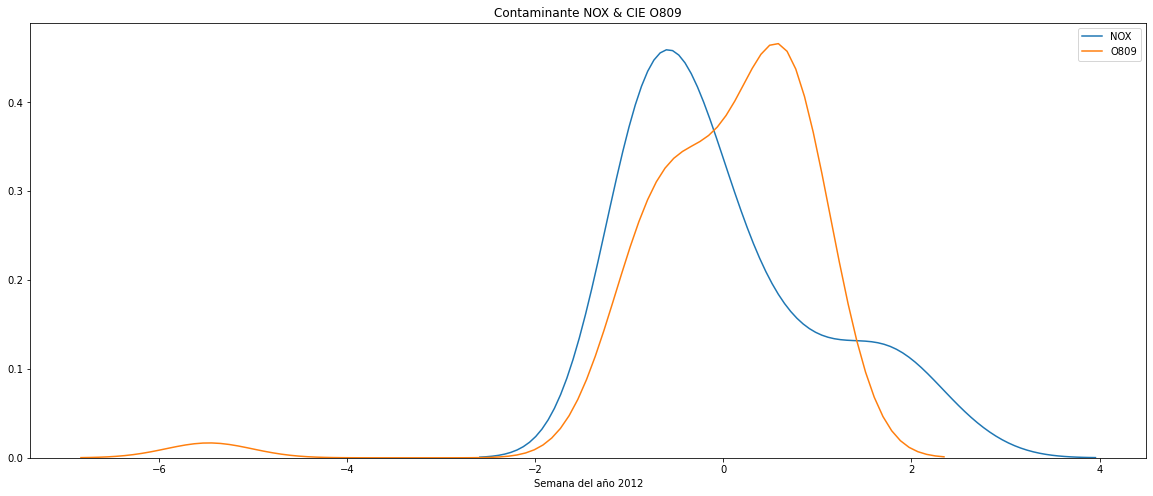


NOX & O800


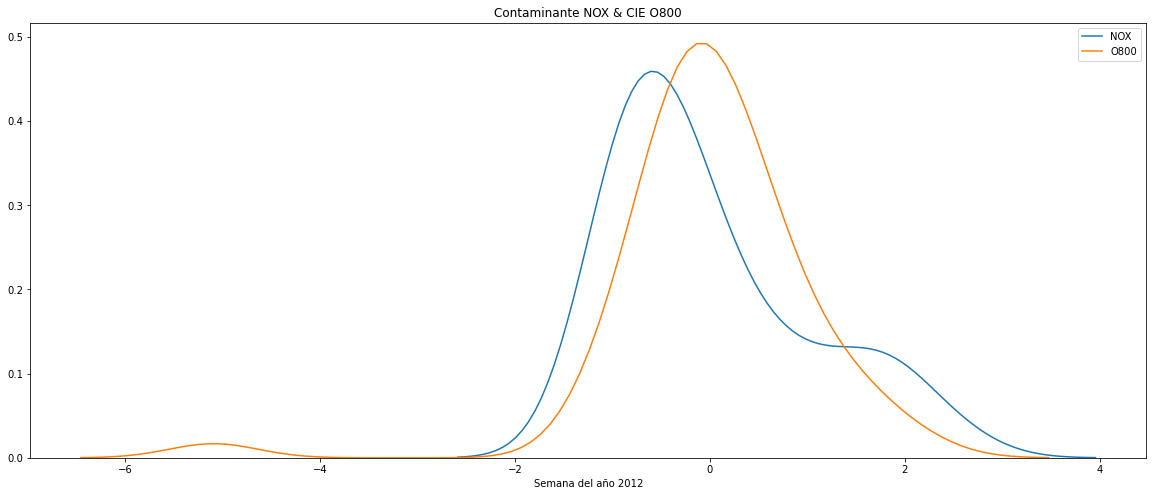


NOX & O829


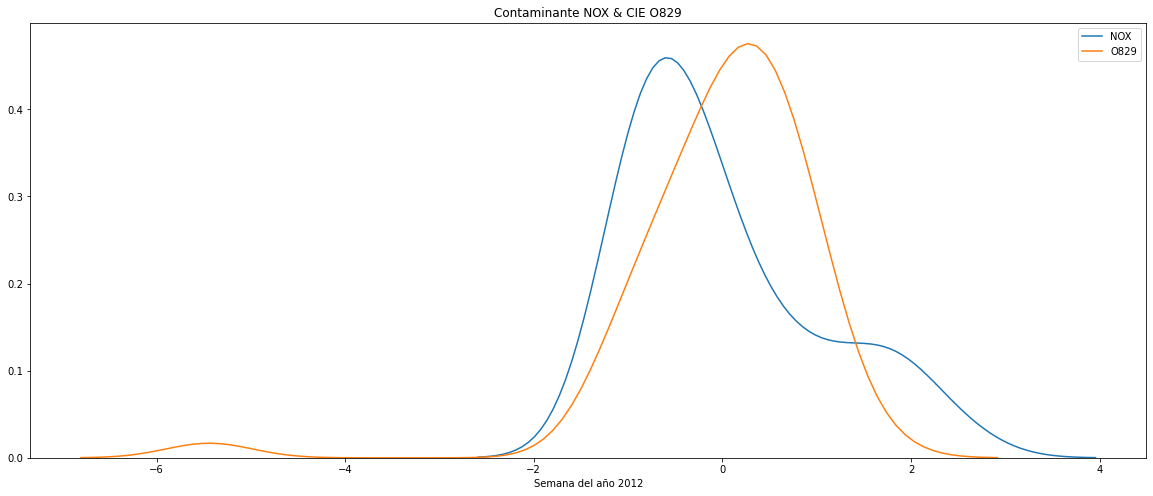


NOX & O064


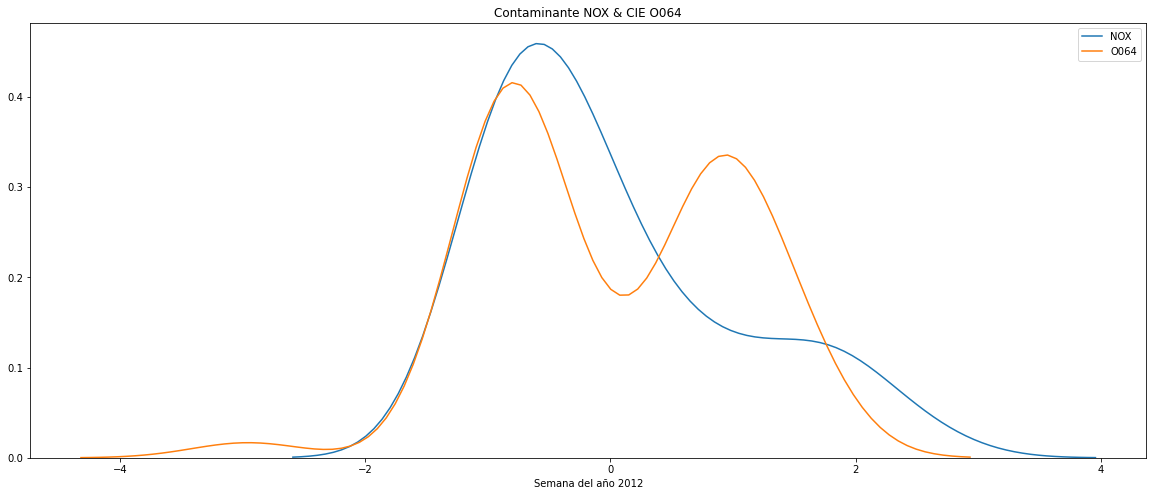


NOX & N189


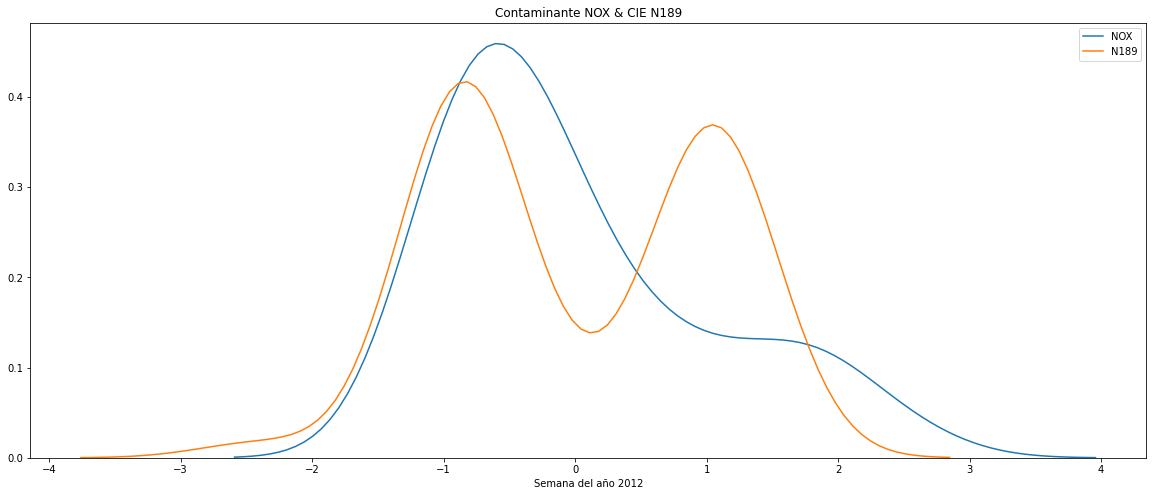


NOX & O342


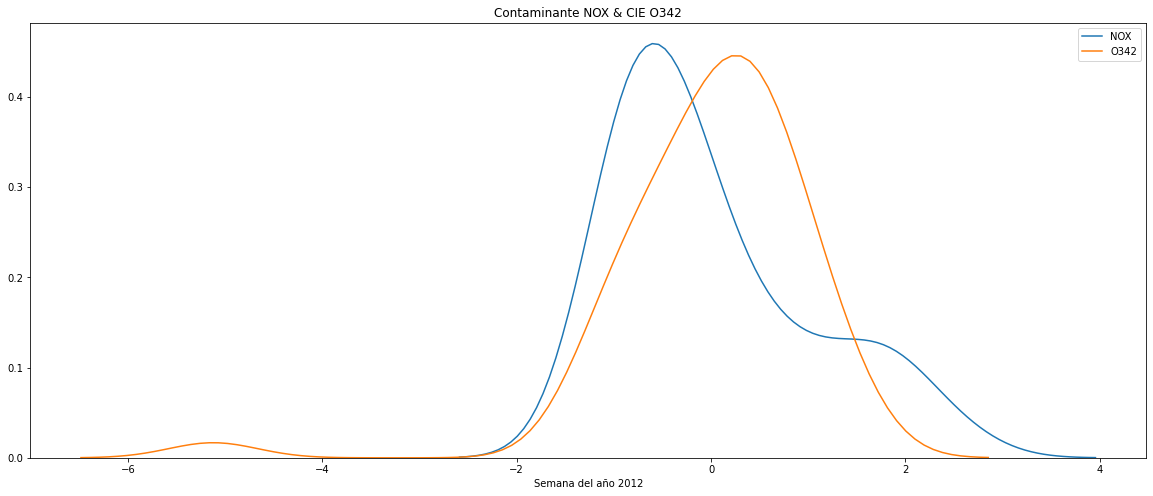


NOX & K359


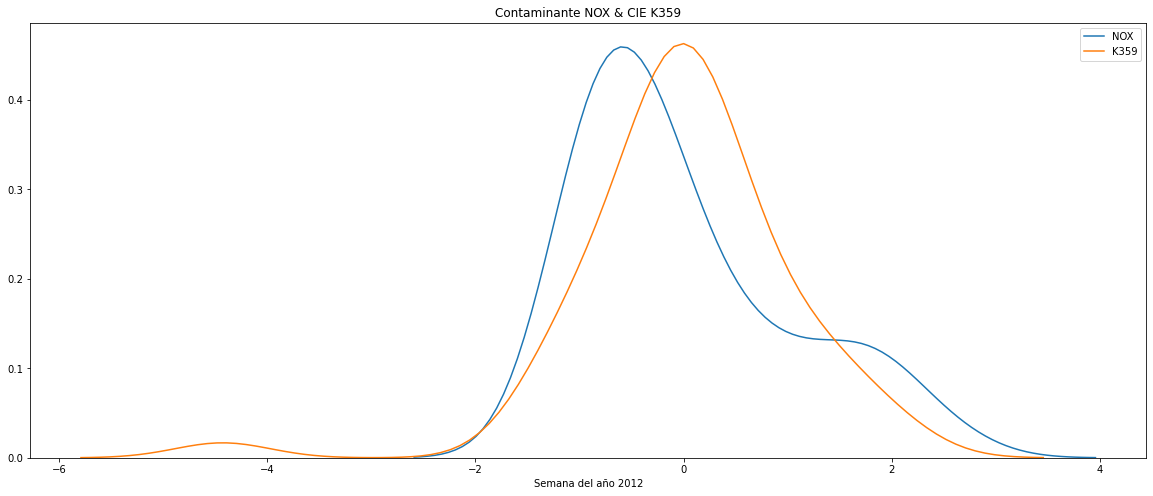


NOX & H


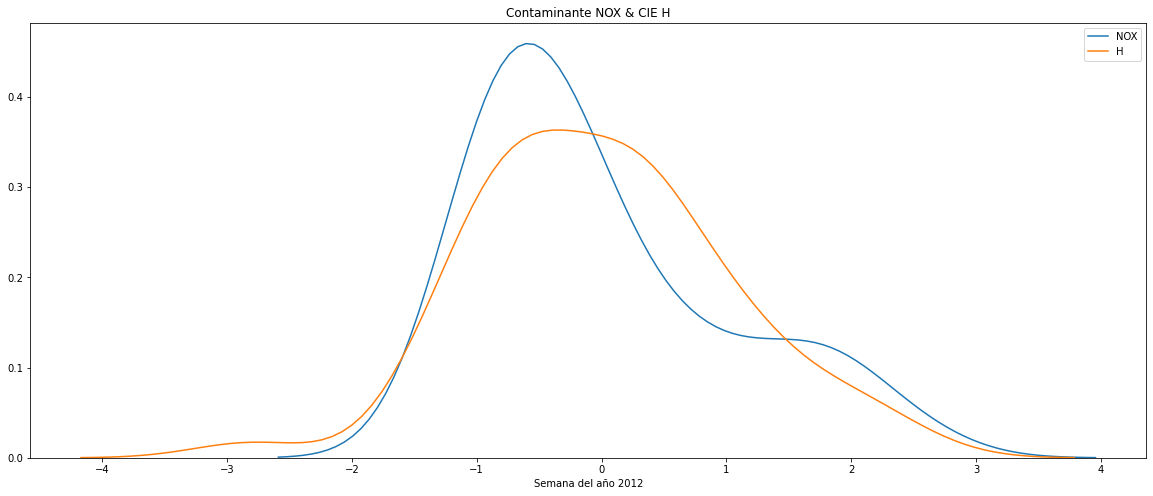


NOX & I


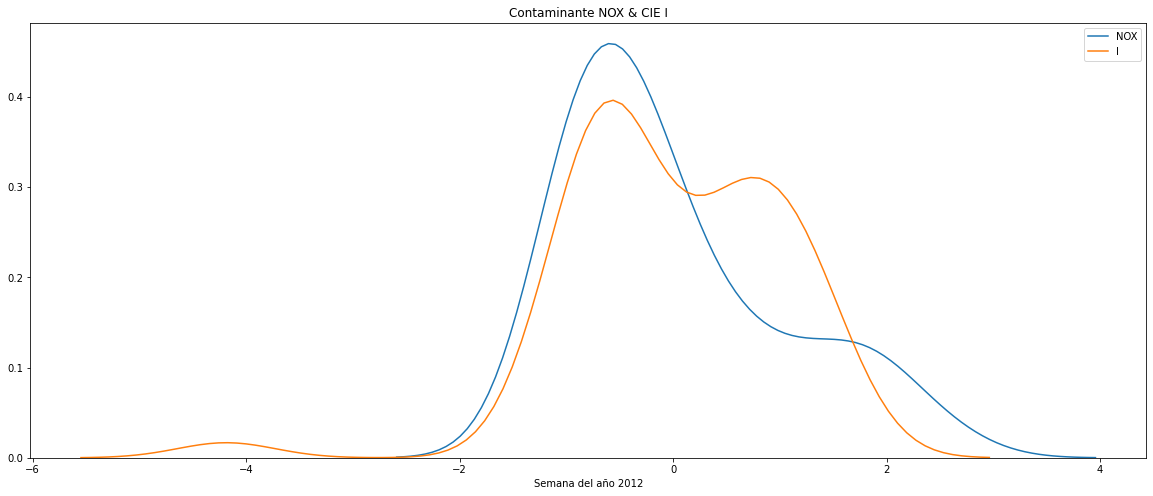


NOX & J


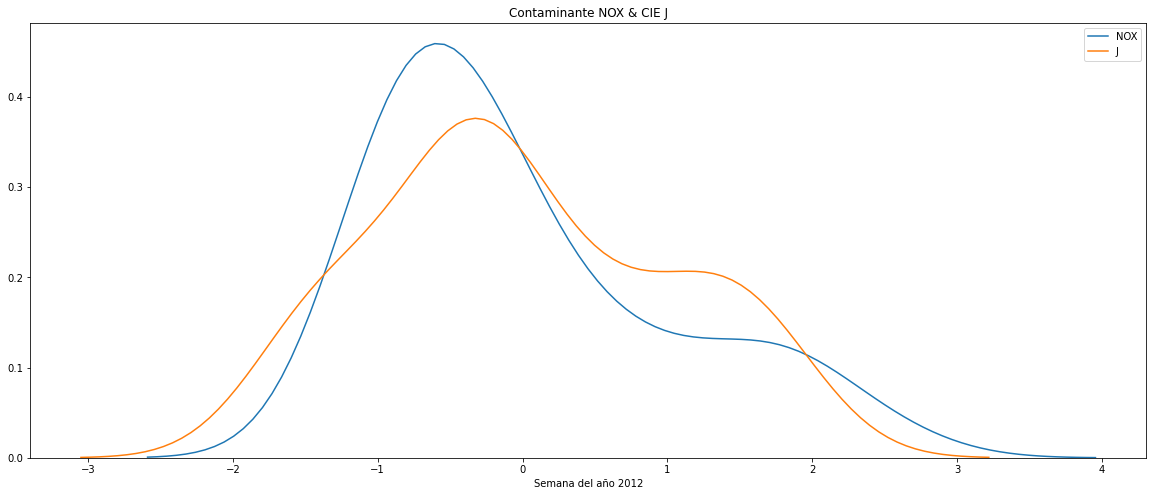

In [26]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2013)

In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2013'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp    NOX
0      2013-01-01 00  169.5
1      2013-01-01 00  214.8
2      2013-01-01 00  126.7
3      2013-01-01 00  279.7
4      2013-01-01 00  306.1
...              ...    ...
71411  2013-12-31 23  181.3
71412  2013-12-31 23   47.3
71413  2013-12-31 23   21.7
71414  2013-12-31 23   21.0
71415  2013-12-31 23   23.5

[71416 rows x 2 columns]

In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp    NOX
0     2013-01-01 00:00:00  169.5
1     2013-01-01 00:00:00  214.8
2     2013-01-01 00:00:00  126.7
3     2013-01-01 00:00:00  279.7
4     2013-01-01 00:00:00  306.1
...                   ...    ...
71411 2013-12-31 23:00:00  181.3
71412 2013-12-31 23:00:00   47.3
71413 2013-12-31 23:00:00   21.7
71414 2013-12-31 23:00:00   21.0
71415 2013-12-31 23:00:00   23.5

[71416 rows x 2 columns]

In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp    NOX  sem
0     2013-01-01 00:00:00  169.5    1
1     2013-01-01 00:00:00  214.8    1
2     2013-01-01 00:00:00  126.7    1
3     2013-01-01 00:00:00  279.7    1
4     2013-01-01 00:00:00  306.1    1
...                   ...    ...  ...
71411 2013-12-31 23:00:00  181.3    1
71412 2013-12-31 23:00:00   47.3    1
71413 2013-12-31 23:00:00   21.7    1
71414 2013-12-31 23:00:00   21.0    1
71415 2013-12-31 23:00:00   23.5    1

[71416 rows x 3 columns]

In [30]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        26/12/2012     O821
1        26/12/2012     O010
2        26/12/2012     O821
3        26/12/2012     O809
4        26/12/2012     O620
...             ...      ...
2879308  04/08/2013     E145
2879309  03/08/2013     J459
2879310  04/08/2013     S720
2879311  05/07/2013     D443
2879312  26/08/2013     N189

[2879313 rows x 2 columns]

In [31]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2013-02-27     N189    9
1       2013-02-27     N189    9
2       2013-02-27     D24X    9
3       2013-02-27     D259    9
4       2013-02-27     H269    9
...            ...      ...  ...
2838186 2013-08-04     E145   32
2838187 2013-08-03     J459   31
2838188 2013-08-04     S720   32
2838189 2013-07-05     D443   27
2838190 2013-08-26     N189   35

[2838191 rows x 3 columns]

In [32]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     30917
2     51944
3     54767
4     55143
5     56515
6     53178
7     56002
8     55853
9     55571
10    56491
11    56657
12    53958
13    51466
14    52506
15    54445
16    55322
17    55199
18    51481
19    54249
20    54902
21    56010
22    55427
23    55435
24    55423
25    54589
26    54972
27    54102
28    55326
29    54767
30    55215
31    55467
32    56402
33    57405
34    57124
35    58985
36    58378
37    59142
38    55204
39    59186
40    59148
41    59384
42    58773
43    57475
44    56153
45    57378
46    57442
47    53195
48    56061
49    55459
50    54729
51    53190
52    24679
Name: sem, dtype: int64

In [33]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  34.2055
1     2  62.1105
2     3  35.2706
3     4  45.8856
4     5  38.1162
5     6  32.2121
6     7  32.2901
7     8  33.9005
8     9  31.3052
9    10  35.3043
10   11  28.5836
11   12  34.5206
12   13  18.9182
13   14  22.1372
14   15  23.6755
15   16   21.464
16   17  22.7942
17   18  22.2411
18   19  18.7745
19   20  24.7201
20   21  19.2119
21   22  14.8881
22   23  16.7021
23   24  16.5547
24   25  13.9241
25   26  14.4407
26   27  20.8394
27   28  31.2519
28   29  21.8371
29   30  14.6412
30   31  13.7275
31   32  22.8264
32   33  19.0226
33   34  15.8414
34   35  15.0935
35   36  20.0583
36   37    21.22
37   38   17.852
38   39  25.6186
39   40  20.4538
40   41     25.1
41   42  18.9993
42   43   27.852
43   44  26.8929
44   45  30.5524
45   46    47.24
46   47  30.3499
47   48  32.8054
48   49  50.5679
49   50  44.1109
50   51  49.1853
51   52  28.1165


2013

NOX & O809


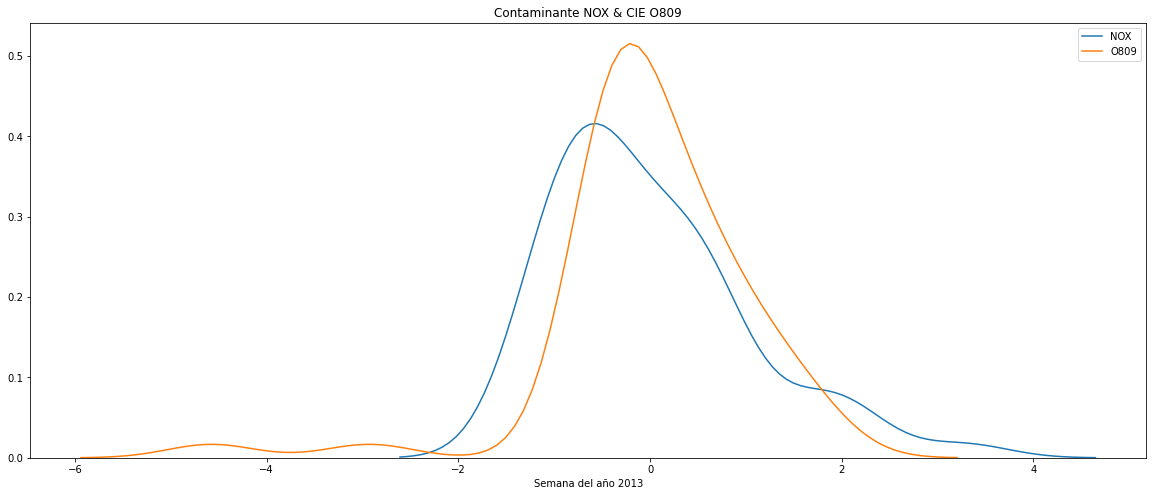


NOX & O800


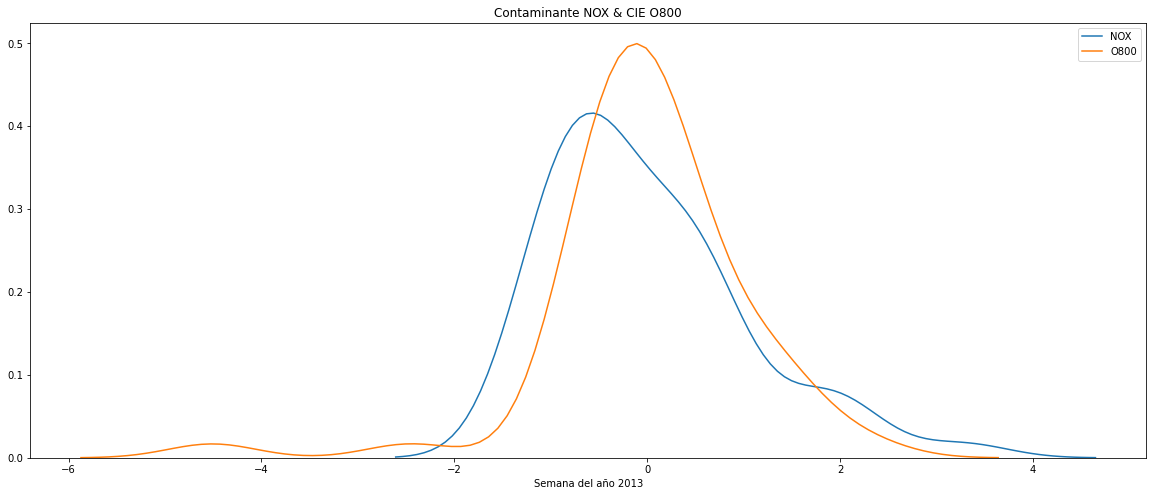


NOX & O829


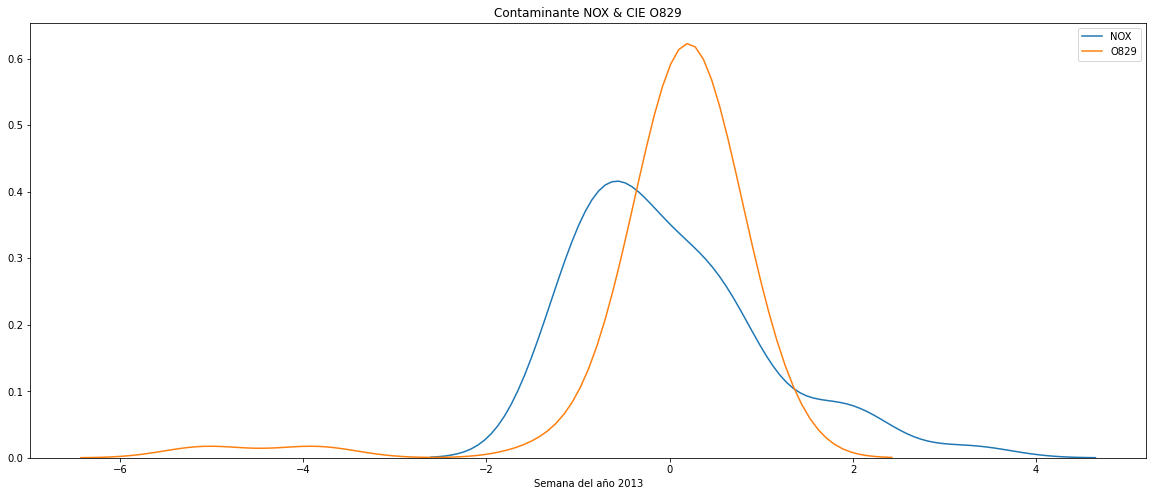


NOX & N189


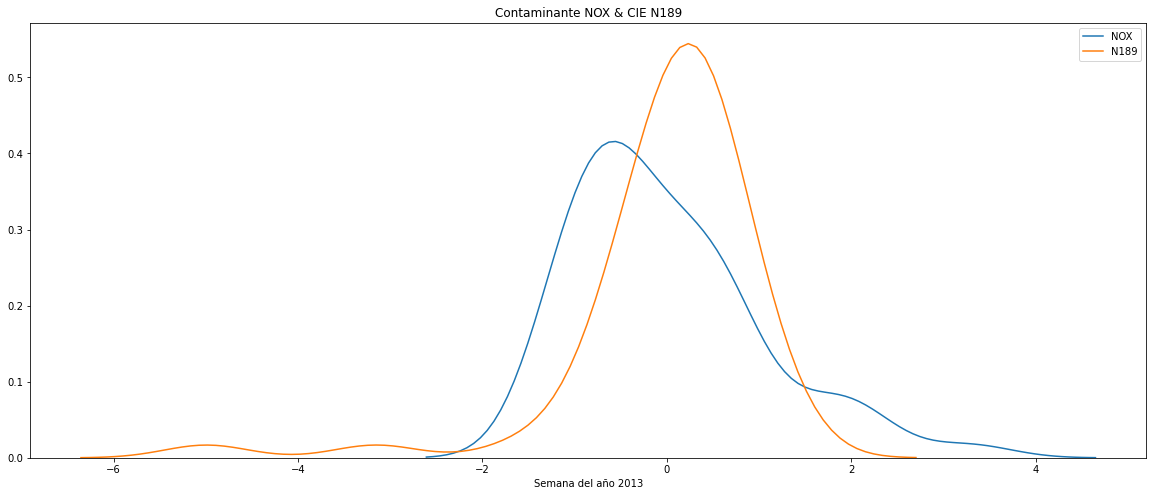


NOX & O064


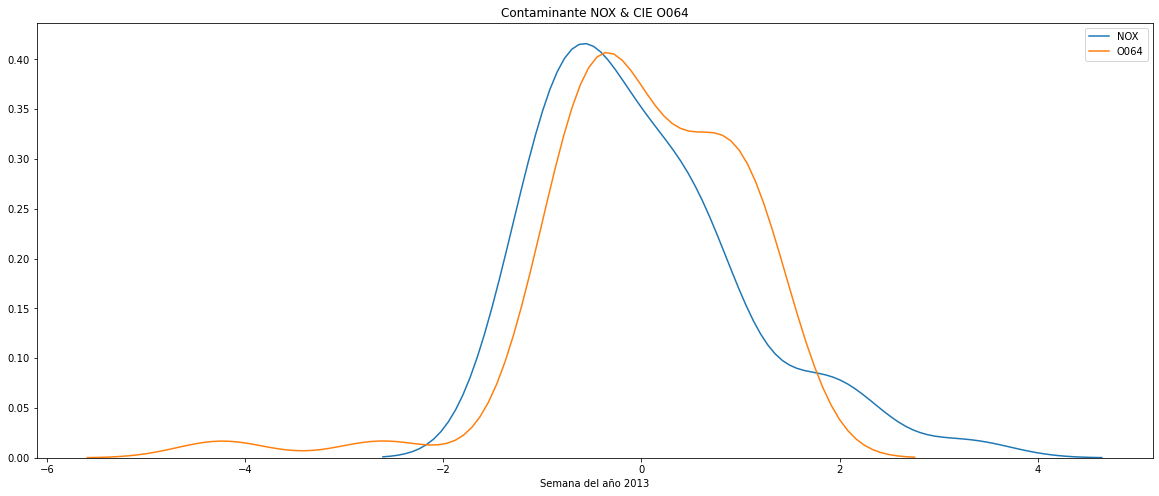


NOX & O342


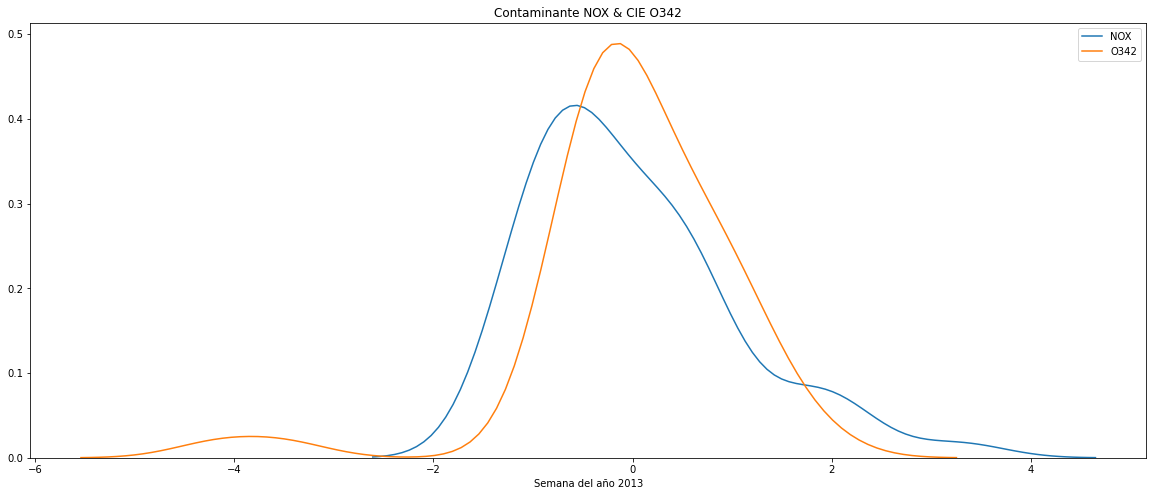


NOX & K359


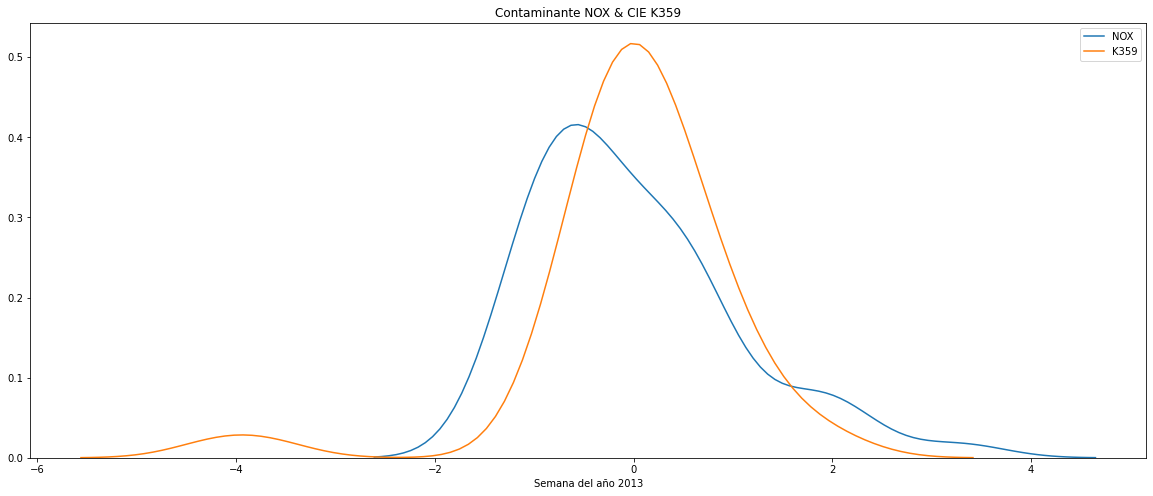


NOX & H


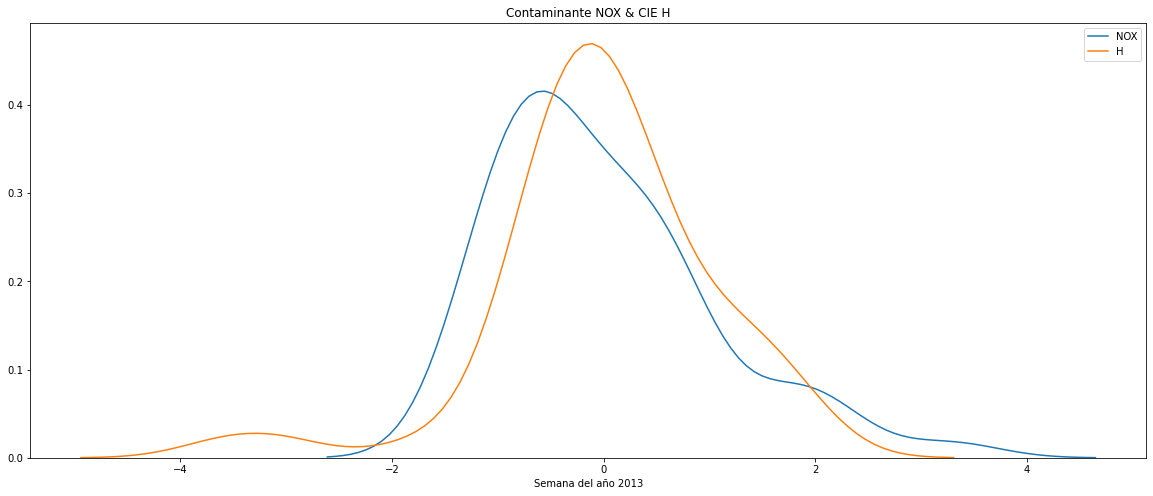


NOX & I


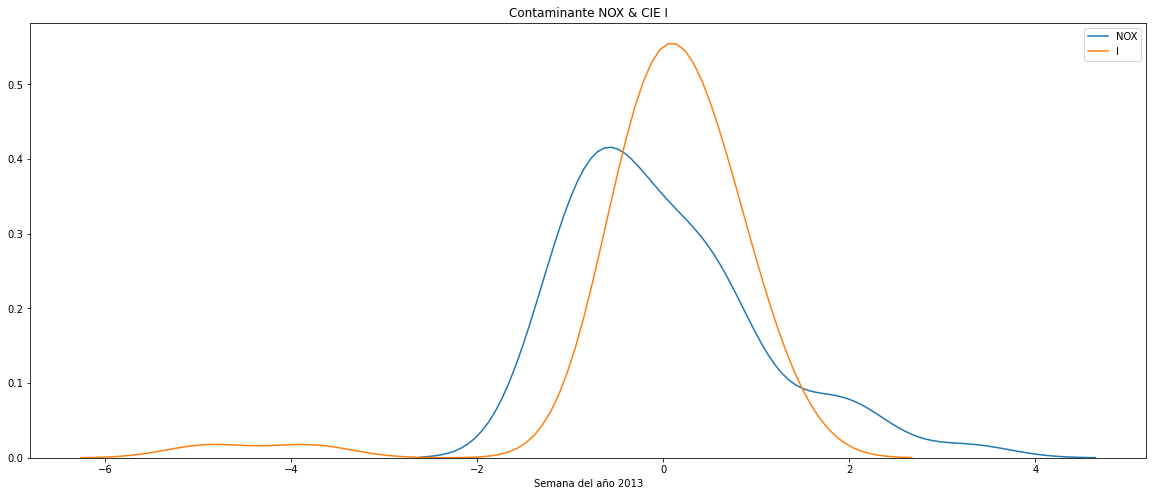


NOX & J


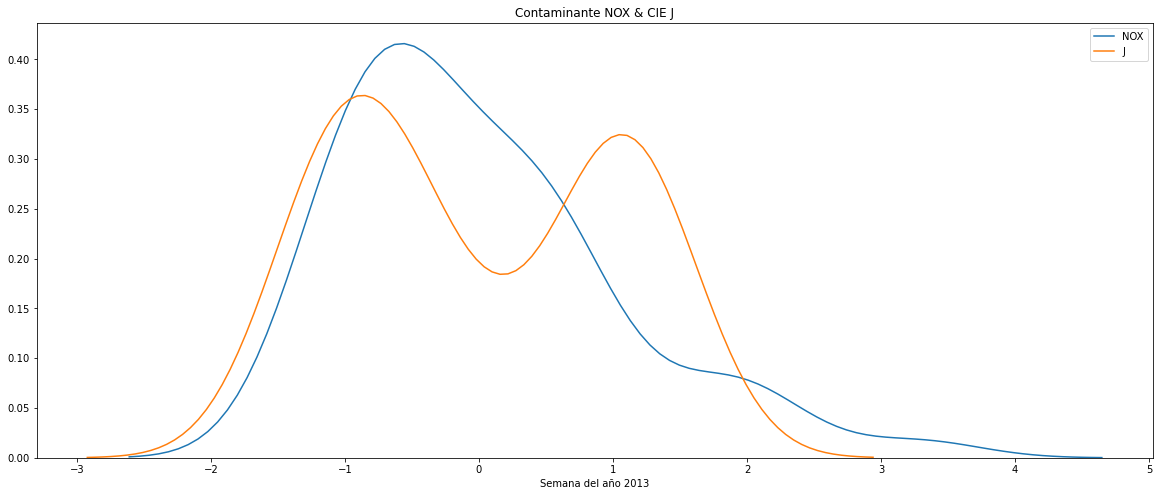

In [34]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2014)

In [35]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp    NOX
0      2014-01-01 00   29.2
1      2014-01-01 00  117.9
2      2014-01-01 00  158.9
3      2014-01-01 00  188.4
4      2014-01-01 00   47.9
...              ...    ...
52256  2014-12-31 23   11.7
52257  2014-12-31 23    9.1
52258  2014-12-31 23    6.9
52259  2014-12-31 23    7.8
52260  2014-12-31 23   13.3

[52261 rows x 2 columns]

In [36]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp    NOX
0     2014-01-01 00:00:00   29.2
1     2014-01-01 00:00:00  117.9
2     2014-01-01 00:00:00  158.9
3     2014-01-01 00:00:00  188.4
4     2014-01-01 00:00:00   47.9
...                   ...    ...
52256 2014-12-31 23:00:00   11.7
52257 2014-12-31 23:00:00    9.1
52258 2014-12-31 23:00:00    6.9
52259 2014-12-31 23:00:00    7.8
52260 2014-12-31 23:00:00   13.3

[52261 rows x 2 columns]

In [37]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp    NOX  sem
0     2014-01-01 00:00:00   29.2    1
1     2014-01-01 00:00:00  117.9    1
2     2014-01-01 00:00:00  158.9    1
3     2014-01-01 00:00:00  188.4    1
4     2014-01-01 00:00:00   47.9    1
...                   ...    ...  ...
52256 2014-12-31 23:00:00   11.7   53
52257 2014-12-31 23:00:00    9.1   53
52258 2014-12-31 23:00:00    6.9   53
52259 2014-12-31 23:00:00    7.8   53
52260 2014-12-31 23:00:00   13.3   53

[52261 rows x 3 columns]

In [38]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2014-11-20 00:00:00     P220
1        2014-09-17 00:00:00     O829
2        2014-09-10 00:00:00     O809
3        2014-09-05 00:00:00     O689
4        2014-09-04 00:00:00     O809
...                      ...      ...
2959192  2014-10-02 00:00:00     O649
2959193  2014-11-18 00:00:00     O809
2959194  2014-12-19 00:00:00     O470
2959195  2014-01-14 00:00:00     O809
2959196  2014-02-17 00:00:00     I10X

[2959197 rows x 2 columns]

In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2014-11-20     P220   47
1       2014-09-17     O829   38
2       2014-09-10     O809   37
3       2014-09-05     O689   36
4       2014-09-04     O809   36
...            ...      ...  ...
2918661 2014-10-02     O649   40
2918662 2014-11-18     O809   47
2918663 2014-12-19     O470   51
2918664 2014-01-14     O809    3
2918665 2014-02-17     I10X    8

[2918666 rows x 3 columns]

In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     23312
2     51774
3     55426
4     55220
5     57112
6     53354
7     55606
8     56075
9     56113
10    56754
11    57918
12    54352
13    58534
14    57541
15    57472
16    51809
17    53967
18    53470
19    52428
20    56835
21    56361
22    58079
23    58118
24    57917
25    57070
26    57280
27    56855
28    57669
29    58157
30    57816
31    57907
32    57712
33    57097
34    57984
35    60024
36    60197
37    61139
38    56277
39    60859
40    61418
41    61557
42    59699
43    58636
44    59131
45    57958
46    59866
47    54846
48    59227
49    57866
50    57841
51    56454
52    34577
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  55.4414
1     2  56.4207
2     3  58.1779
3     4  57.5734
4     5   63.584
5     6  43.2462
6     7  57.8096
7     8  37.9695
8     9  38.5415
9    10  26.2179
10   11  30.7778
11   12  25.4188
12   13  28.0515
13   14  15.5072
14   15   20.827
15   16  14.1219
16   17  18.9692
17   18  19.9076
18   19  20.7322
19   20  17.4723
20   21  12.3757
21   22  14.2213
22   23  11.8903
23   24  14.5429
24   25  18.7044
25   26  16.4174
26   27  13.5063
27   28  14.7563
28   29  14.1464
29   30   15.817
30   31  14.5768
31   32  15.8306
32   33  15.1315
33   34   13.498
34   35   13.473
35   36  14.5057
36   37  16.0965
37   38  18.4877
38   39  19.6907
39   40  22.7061
40   41  23.9218
41   42  31.2083
42   43  23.0594
43   44  22.9114
44   45  23.2305
45   46  31.6383
46   47  34.1476
47   48   42.742
48   49   34.554
49   50  25.8615
50   51  29.7146
51   52  35.2374


2014

NOX & O809


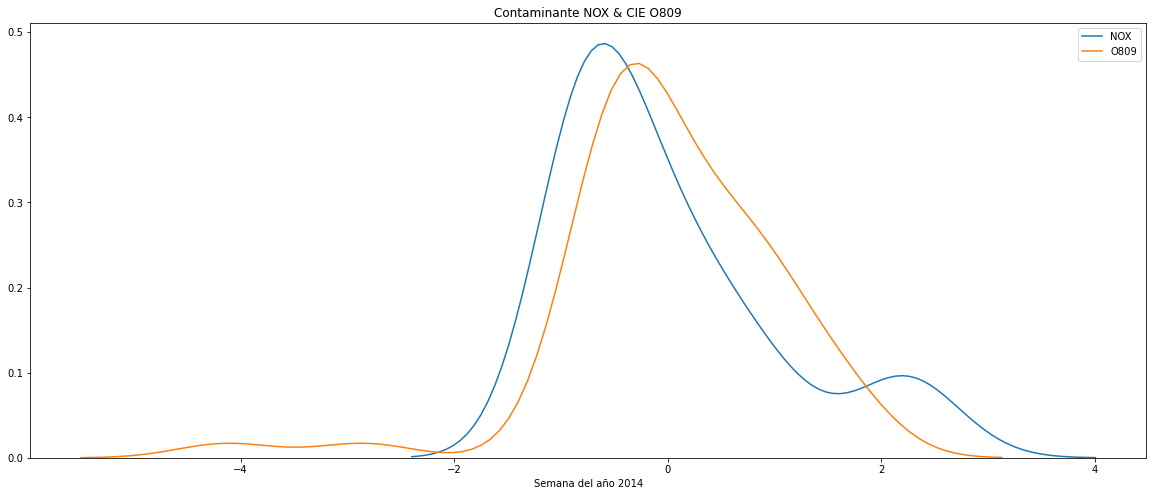


NOX & O800


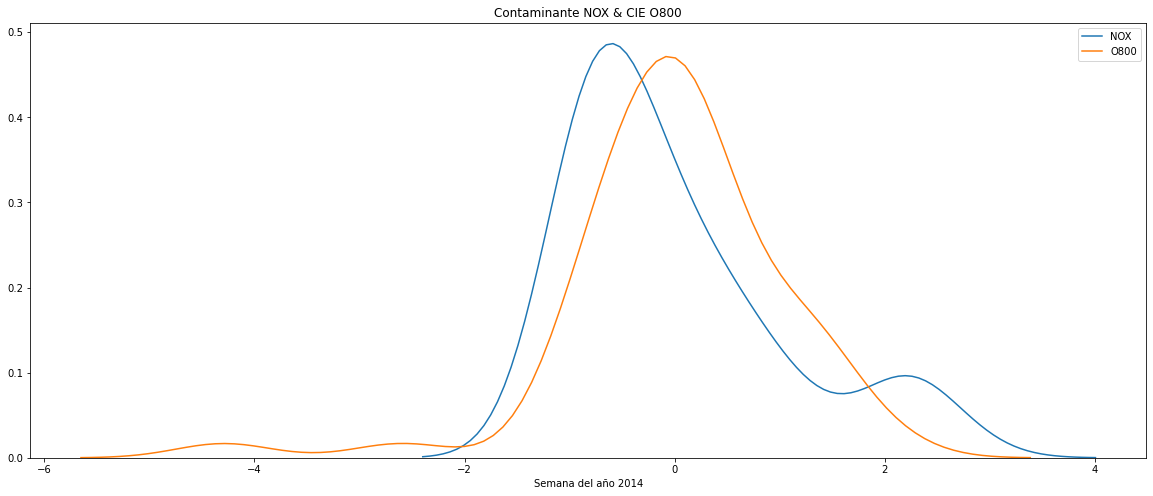


NOX & N189


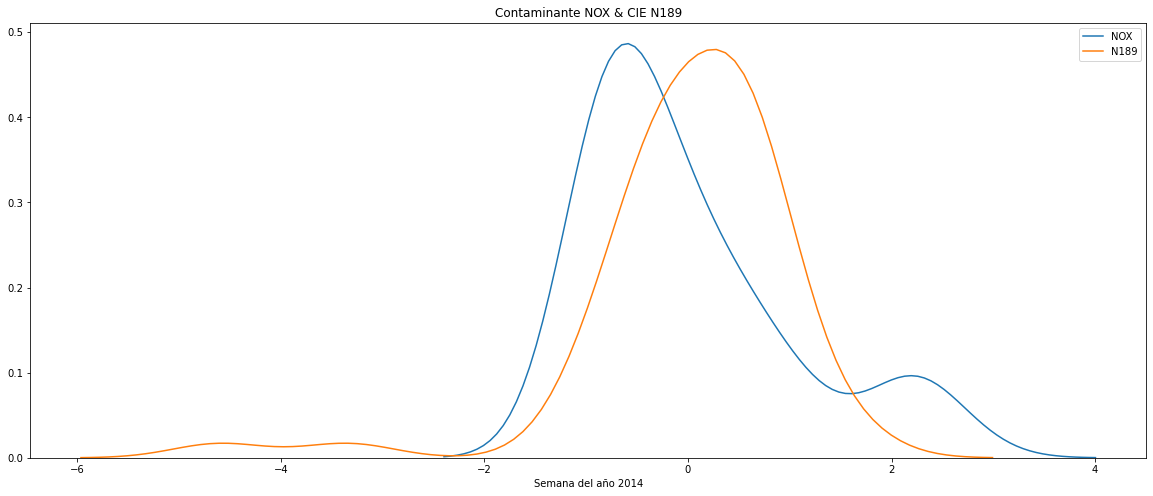


NOX & O829


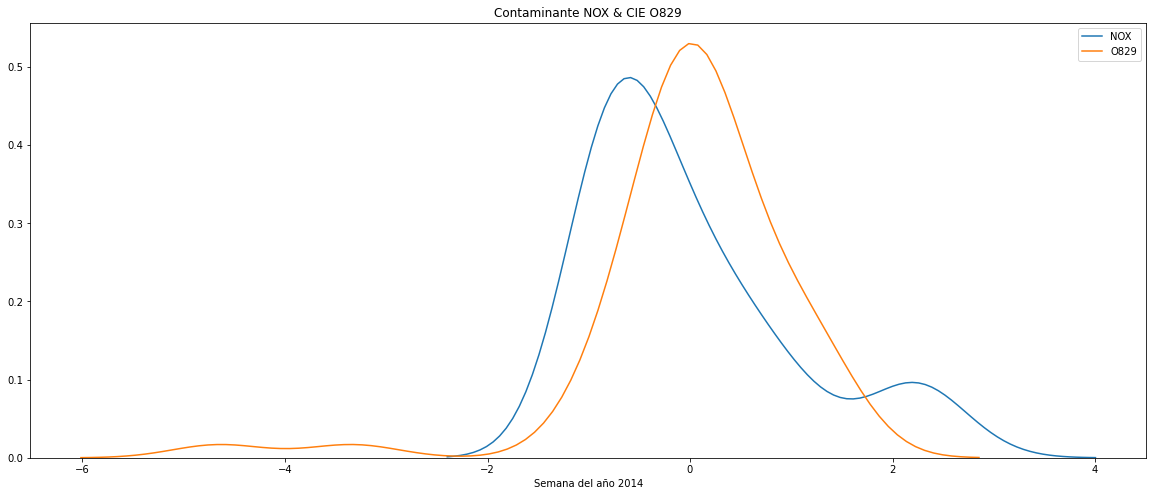


NOX & O064


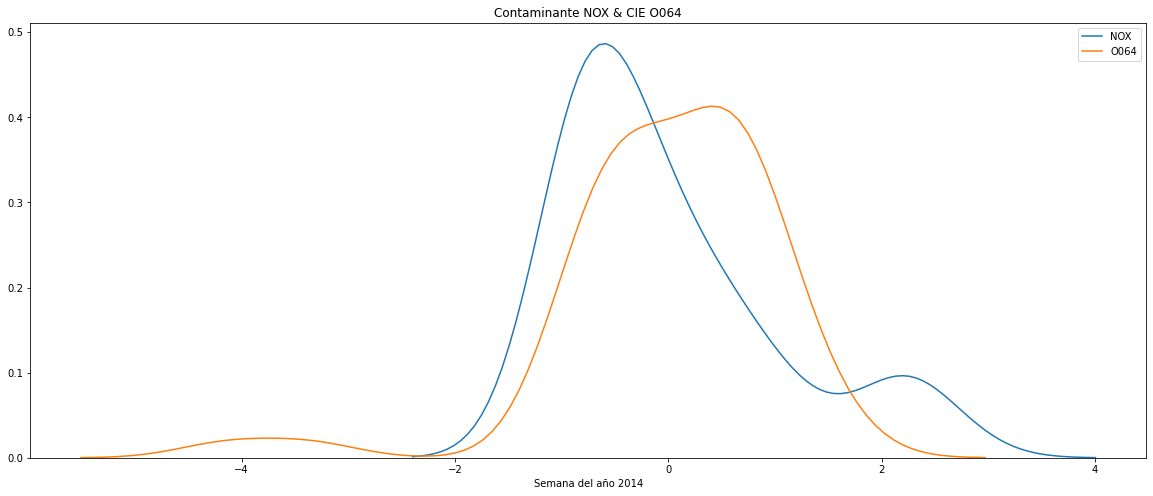


NOX & O342


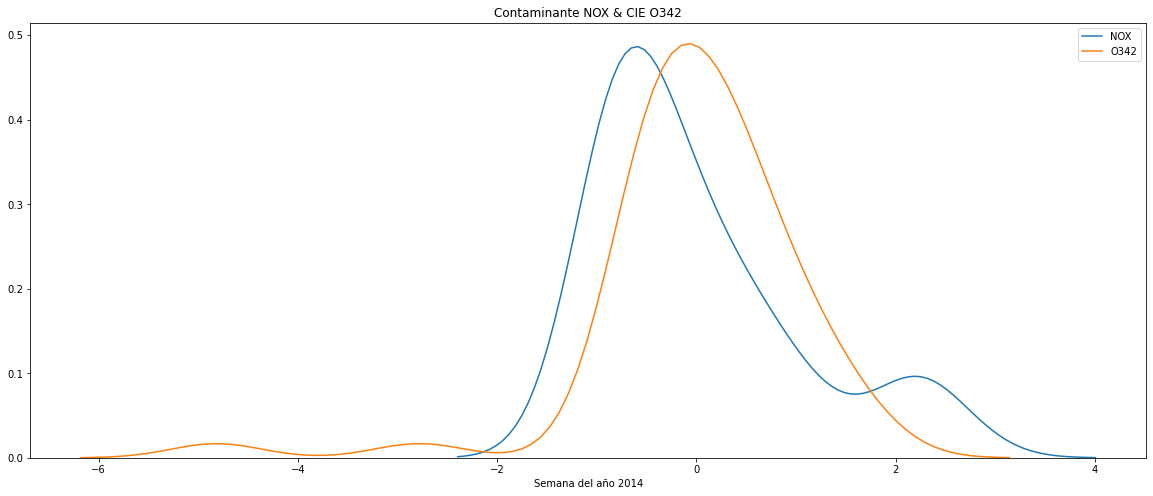


NOX & N185


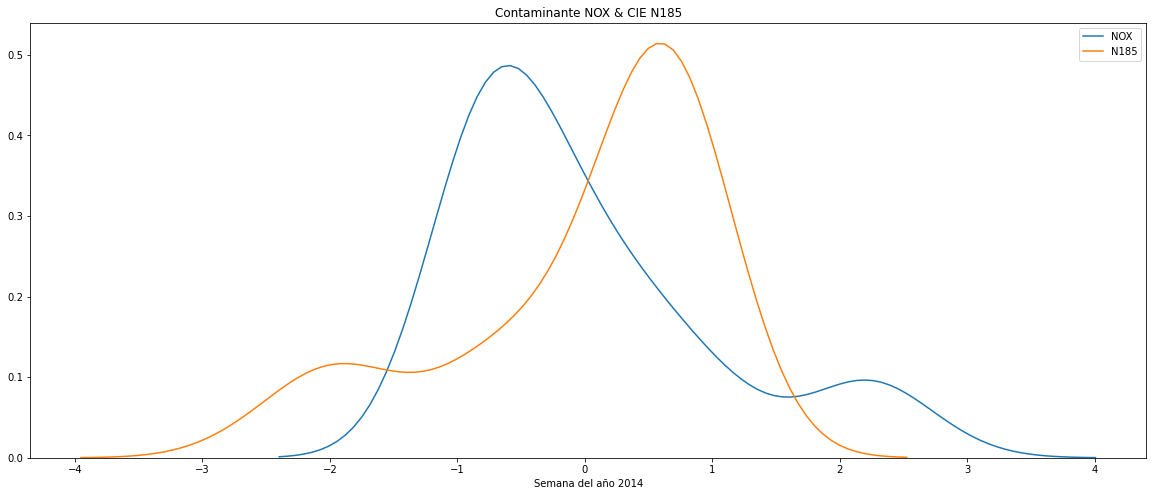


NOX & H


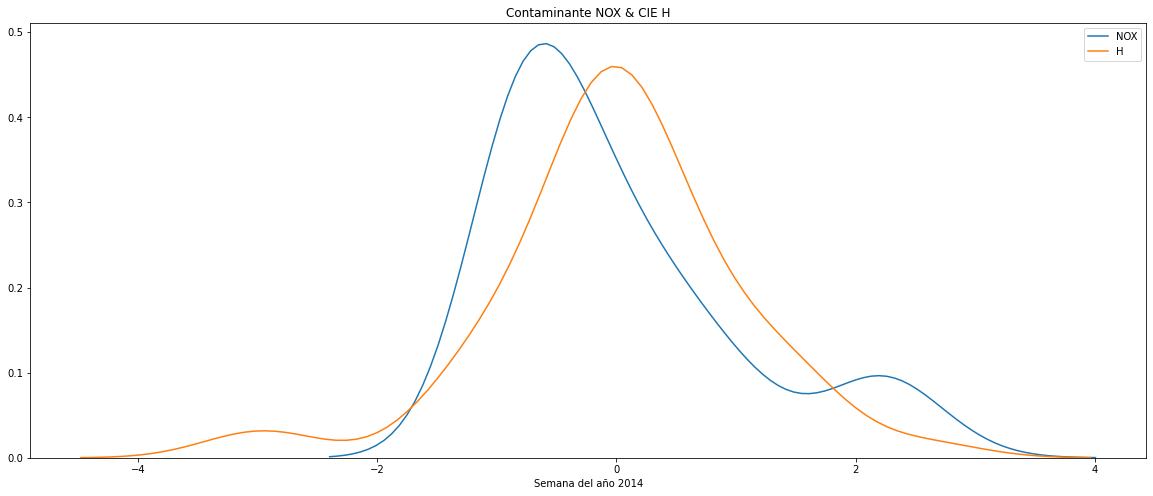


NOX & I


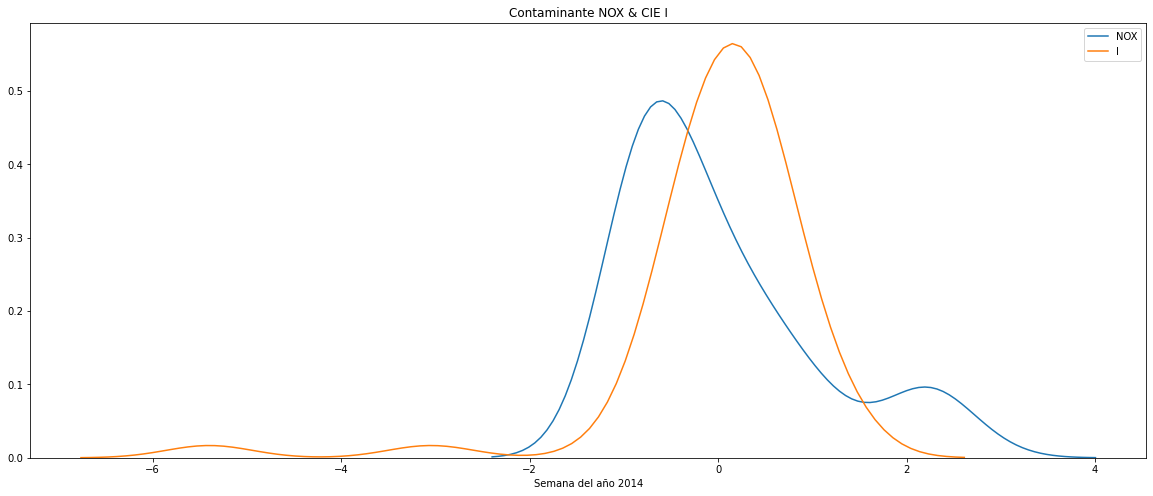


NOX & J


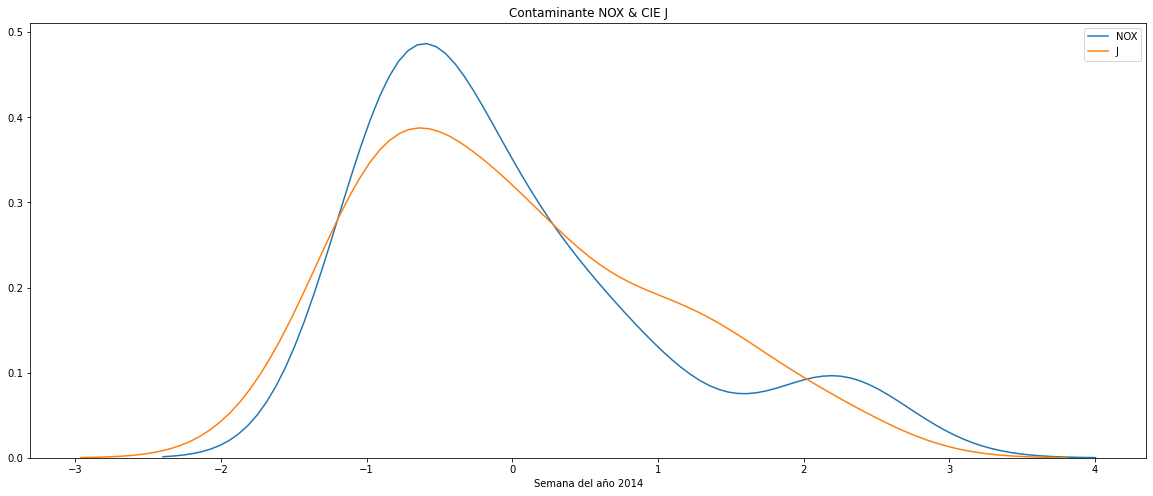

In [42]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2015)

In [43]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp        NOX
0      2015-01-01 00  21.900000
1      2015-01-01 00  10.600000
2      2015-01-01 00   9.200000
3      2015-01-01 00   6.600000
4      2015-01-01 00   6.200000
...              ...        ...
44489  2015-12-31 23   3.500000
44490  2015-12-31 23  24.600000
44491  2015-12-31 23  32.900002
44492  2015-12-31 23  13.600000
44493  2015-12-31 23  23.500000

[44494 rows x 2 columns]

In [44]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp        NOX
0     2015-01-01 00:00:00  21.900000
1     2015-01-01 00:00:00  10.600000
2     2015-01-01 00:00:00   9.200000
3     2015-01-01 00:00:00   6.600000
4     2015-01-01 00:00:00   6.200000
...                   ...        ...
44489 2015-12-31 23:00:00   3.500000
44490 2015-12-31 23:00:00  24.600000
44491 2015-12-31 23:00:00  32.900002
44492 2015-12-31 23:00:00  13.600000
44493 2015-12-31 23:00:00  23.500000

[44494 rows x 2 columns]

In [45]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp        NOX  sem
0     2015-01-01 00:00:00  21.900000   53
1     2015-01-01 00:00:00  10.600000   53
2     2015-01-01 00:00:00   9.200000   53
3     2015-01-01 00:00:00   6.600000   53
4     2015-01-01 00:00:00   6.200000   53
...                   ...        ...  ...
44489 2015-12-31 23:00:00   3.500000   52
44490 2015-12-31 23:00:00  24.600000   52
44491 2015-12-31 23:00:00  32.900002   52
44492 2015-12-31 23:00:00  13.600000   52
44493 2015-12-31 23:00:00  23.500000   52

[44494 rows x 3 columns]

In [46]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=2500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2015-01-03 00:00:00     C910
1        2015-01-03 00:00:00     C845
2        2015-01-03 00:00:00     C189
3        2015-01-03 00:00:00     C509
4        2015-01-03 00:00:00     C220
...                      ...      ...
2499995  2015-02-09 00:00:00     O410
2499996  2015-03-12 00:00:00     K811
2499997  2015-04-08 00:00:00     O809
2499998  2015-05-10 00:00:00     O054
2499999  2015-06-10 00:00:00     P240

[2500000 rows x 2 columns]

In [47]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2015-01-03     C910   53
1       2015-01-03     C845   53
2       2015-01-03     C189   53
3       2015-01-03     C509   53
4       2015-01-03     C220   53
...            ...      ...  ...
2463488 2015-02-09     O410    6
2463489 2015-03-12     K811   10
2463490 2015-04-08     O809   14
2463491 2015-05-10     O054   19
2463492 2015-06-10     P240   23

[2463493 rows x 3 columns]

In [48]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     44314
2     47507
3     48330
4     49381
5     46542
6     49035
7     48313
8     49213
9     48990
10    49905
11    46079
12    49712
13    44580
14    46364
15    47680
16    48058
17    47197
18    44426
19    47733
20    48187
21    48794
22    48484
23    48844
24    47430
25    46821
26    48245
27    49058
28    48403
29    48423
30    49374
31    49081
32    49114
33    49120
34    49473
35    49948
36    50555
37    46763
38    50028
39    50709
40    51615
41    49976
42    48570
43    49416
44    46316
45    49821
46    45952
47    49110
48    49021
49    47650
50    46348
51    35336
53    14149
Name: sem, dtype: int64

In [49]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  27.2419
1     2  36.2909
2     3  31.4042
3     4  33.5467
4     5  28.7471
5     6  29.6562
6     7  29.4589
7     8  22.4619
8     9  20.3117
9    10  27.3799
10   11   24.002
11   12  18.9838
12   13  23.9385
13   14  16.6812
14   15  19.1078
15   16  19.6297
16   17  16.3467
17   18  14.4296
18   19  12.9423
19   20  13.2188
20   21  11.0691
21   22  9.82669
22   23  9.90511
23   24  12.0804
24   25  10.2401
25   26  10.2595
26   27     9.88
27   28  10.1251
28   29  10.3063
29   30  10.5894
30   31  9.83619
31   32  11.2766
32   33   11.869
33   34  10.6695
34   35  12.4238
35   36  14.5799
36   37    13.83
37   38  15.3583
38   39  20.3137
39   40  17.2848
40   41  21.5451
41   42  17.2346
42   43  27.4686
43   44   21.887
44   45  21.6406
45   46  29.9226
46   47  22.0774
47   48  31.0829
48   49  46.6721
49   50   38.955
50   51  46.0486
51   53  22.1377


2015

NOX & O809


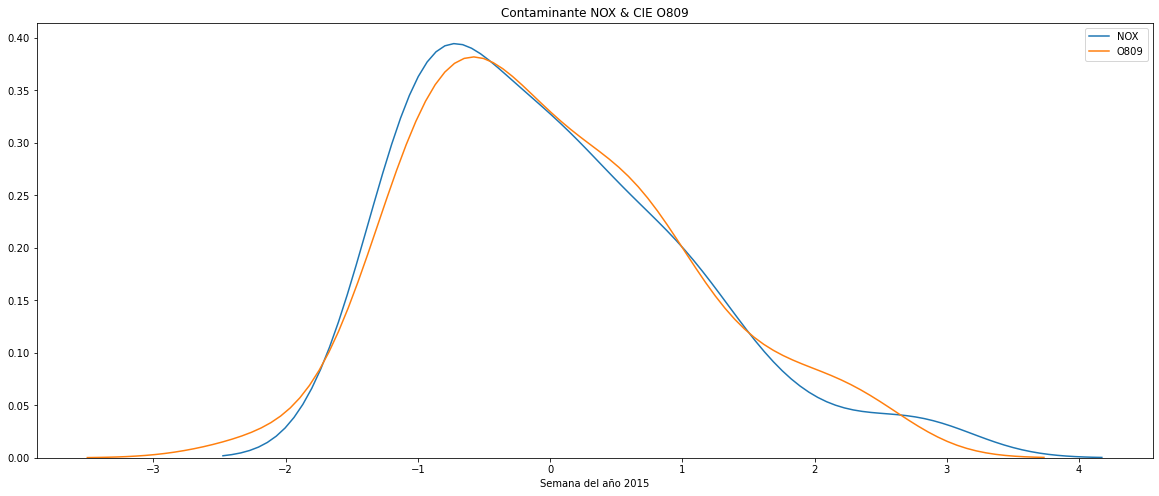


NOX & N189


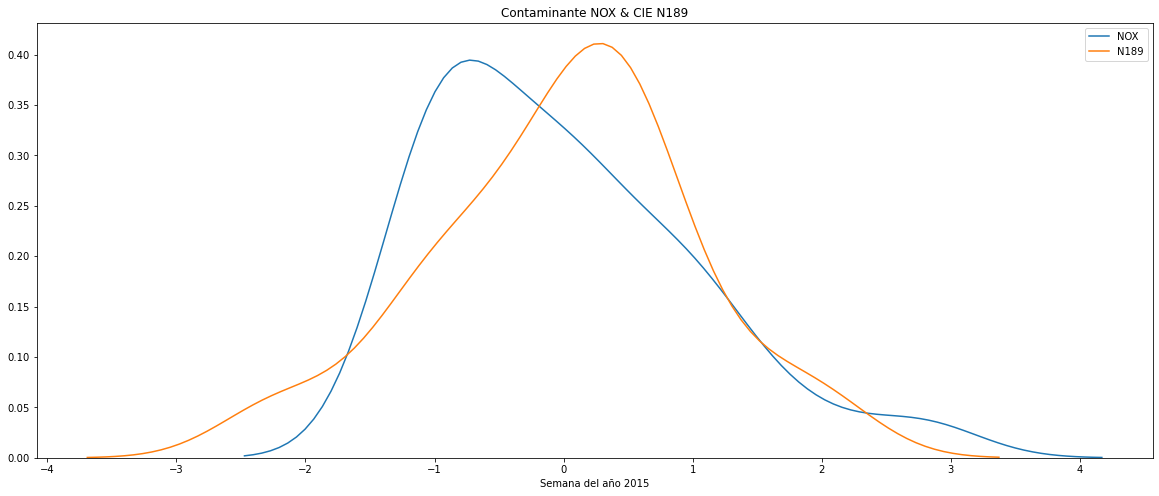


NOX & O800


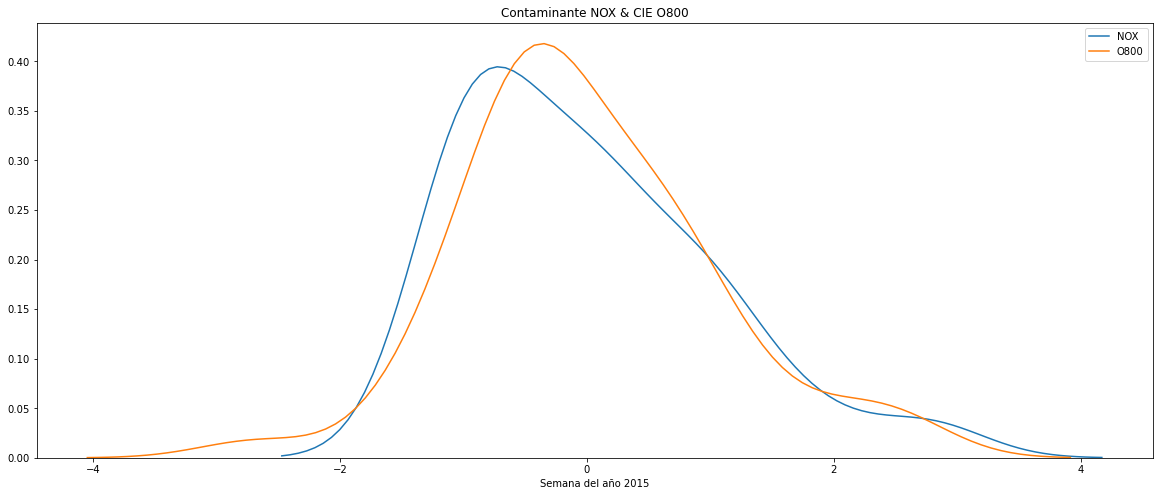


NOX & O829


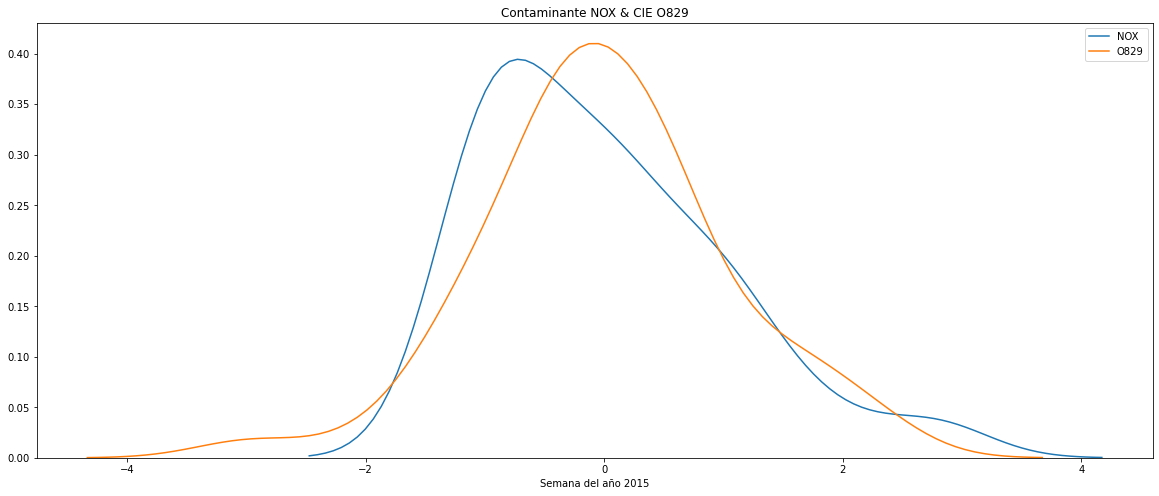


NOX & O064


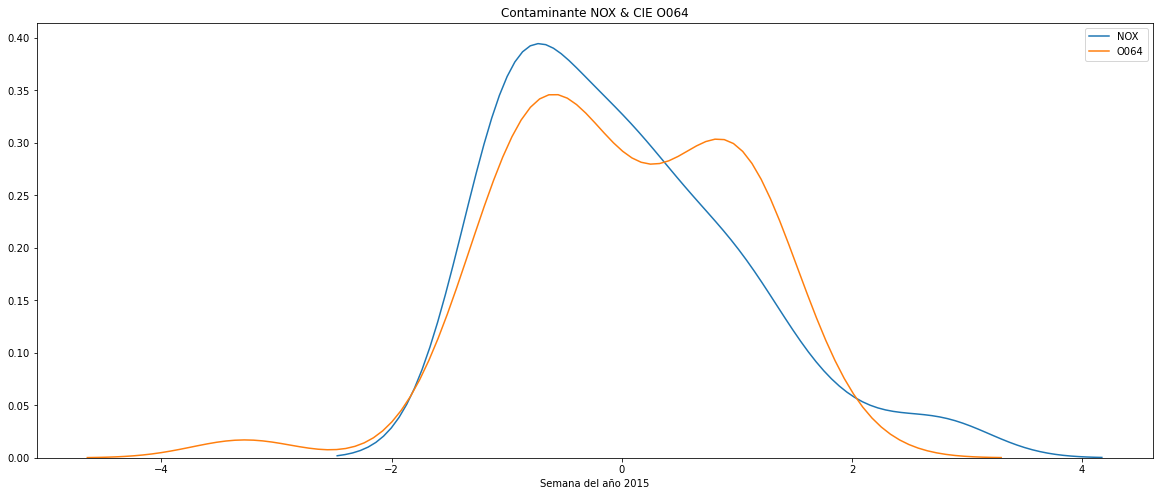


NOX & O342


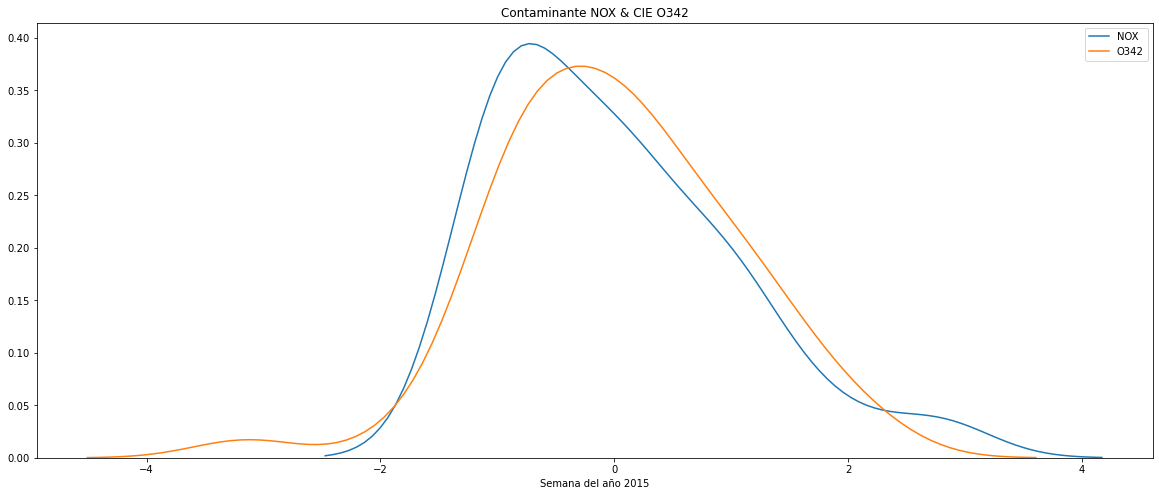


NOX & K358


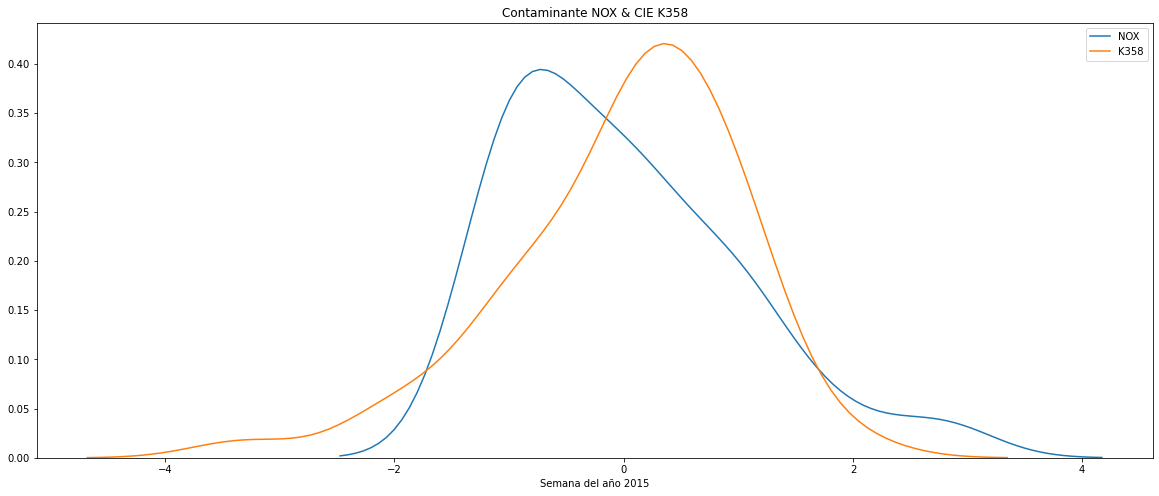


NOX & H


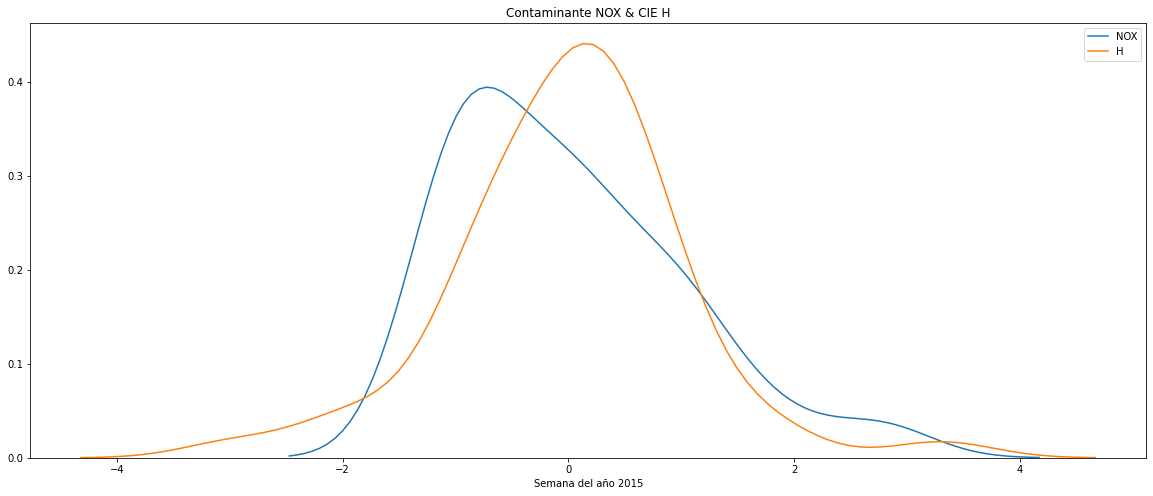


NOX & I


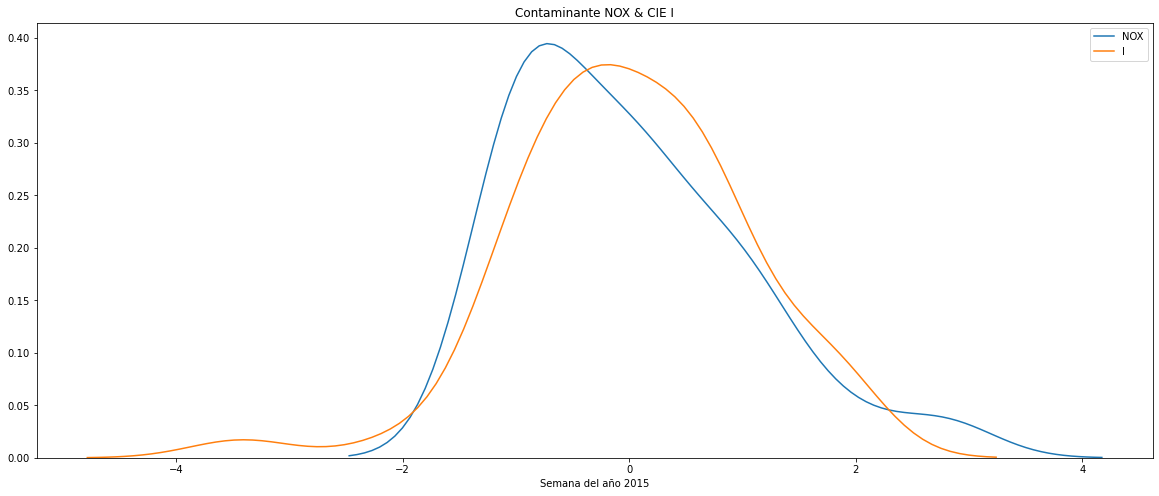


NOX & J


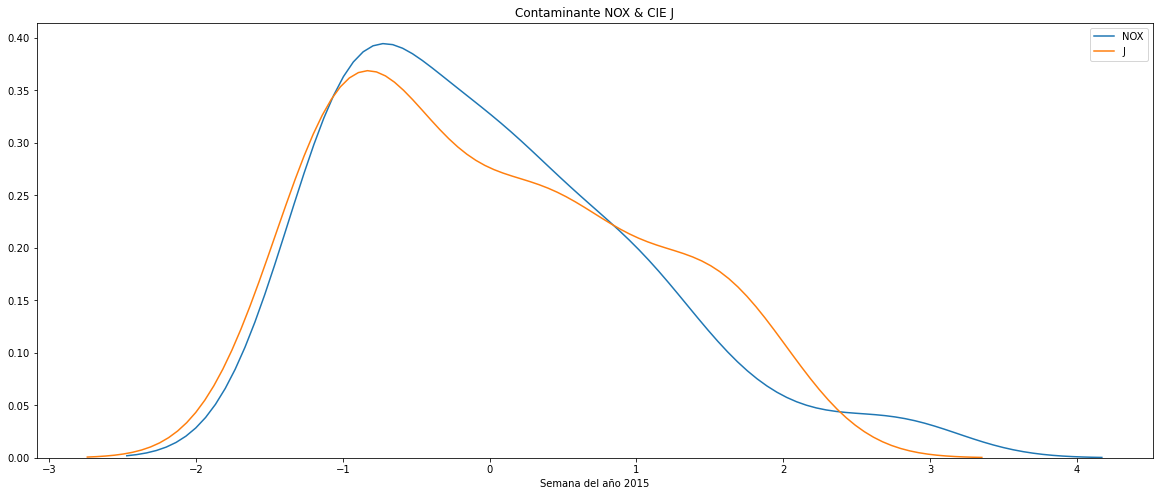

In [50]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [51]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp        NOX
0      2016-01-01 00   9.400000
1      2016-01-01 00   4.000000
2      2016-01-01 00  22.300000
3      2016-01-01 00  12.900000
4      2016-01-01 00  28.300000
...              ...        ...
37493  2016-12-31 22  46.800000
37494  2016-12-31 23  36.200001
37495  2016-12-31 23  15.200000
37496  2016-12-31 23  73.300003
37497  2016-12-31 23  25.600000

[37498 rows x 2 columns]

In [52]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp        NOX
0     2016-01-01 00:00:00   9.400000
1     2016-01-01 00:00:00   4.000000
2     2016-01-01 00:00:00  22.300000
3     2016-01-01 00:00:00  12.900000
4     2016-01-01 00:00:00  28.300000
...                   ...        ...
37493 2016-12-31 22:00:00  46.800000
37494 2016-12-31 23:00:00  36.200001
37495 2016-12-31 23:00:00  15.200000
37496 2016-12-31 23:00:00  73.300003
37497 2016-12-31 23:00:00  25.600000

[37498 rows x 2 columns]

In [53]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp        NOX  sem
0     2016-01-01 00:00:00   9.400000   52
1     2016-01-01 00:00:00   4.000000   52
2     2016-01-01 00:00:00  22.300000   52
3     2016-01-01 00:00:00  12.900000   52
4     2016-01-01 00:00:00  28.300000   52
...                   ...        ...  ...
37493 2016-12-31 22:00:00  46.800000   52
37494 2016-12-31 23:00:00  36.200001   52
37495 2016-12-31 23:00:00  15.200000   52
37496 2016-12-31 23:00:00  73.300003   52
37497 2016-12-31 23:00:00  25.600000   52

[37498 rows x 3 columns]

In [54]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        12/30/2015 00:00     N185
1        12/31/2015 00:00     N185
2        12/31/2015 00:00     N185
3        01/02/2016 00:00     N185
4        01/02/2016 00:00     N185
...                   ...      ...
1048570  08/24/2016 00:00     E115
1048571  08/17/2016 00:00     O809
1048572  08/21/2016 00:00     O809
1048573  08/22/2016 00:00     O809
1048574  08/19/2016 00:00     O809

[1048574 rows x 2 columns]

In [55]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2016-01-02     N185   52
1       2016-01-02     N185   52
2       2016-01-02     N185   52
3       2016-01-02     N185   52
4       2016-01-02     N185   52
...            ...      ...  ...
1032801 2016-08-24     E115   34
1032802 2016-08-17     O809   33
1032803 2016-08-21     O809   34
1032804 2016-08-22     O809   34
1032805 2016-08-19     O809   33

[1032806 rows x 3 columns]

In [56]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17589
2     19491
3     19832
4     20191
5     19086
6     20157
7     19888
8     20511
9     20626
10    20529
11    20988
12    17365
13    19319
14    20001
15    20455
16    19735
17    20120
18    19200
19    19319
20    19965
21    20731
22    19958
23    20423
24    20138
25    19626
26    19910
27    20014
28    20014
29    20375
30    20131
31    20075
32    20357
33    20336
34    20555
35    20810
36    21251
37    20265
38    21211
39    21159
40    20842
41    20627
42    20497
43    20288
44    18737
45    19961
46    19748
47    18405
48    19142
49    18985
50    18585
51    18338
52    16945
Name: sem, dtype: int64

In [57]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1    27.47
1     2  31.8032
2     3  34.4252
3     4  38.4306
4     5  28.5444
5     6   33.764
6     7  27.1487
7     8  19.9267
8     9  22.6026
9    10  22.9371
10   11  28.4194
11   12  19.6472
12   13  64.5642
13   14  18.5178
14   15  18.6911
15   16  16.8417
16   17  20.5489
17   18  17.6271
18   19  18.0054
19   20  18.5914
20   21  20.3478
21   22  20.4707
22   23  21.6985
23   24  19.3063
24   25  16.0514
25   26  18.7967
26   27  19.2482
27   28  16.1811
28   29  14.8226
29   30  15.5888
30   31  14.8904
31   32  17.1843
32   33   17.739
33   34  16.1612
34   35  19.7114
35   36  19.5065
36   37  20.3191
37   38  19.1443
38   39   21.683
39   40  23.4236
40   41  23.5498
41   42  27.0451
42   43  26.3757
43   44  24.6303
44   45  26.7742
45   46  38.9172
46   47  31.7714
47   48   29.904
48   49  30.3548
49   50  40.2167
50   51  32.3829
51   52  22.0701


2016

NOX & O809


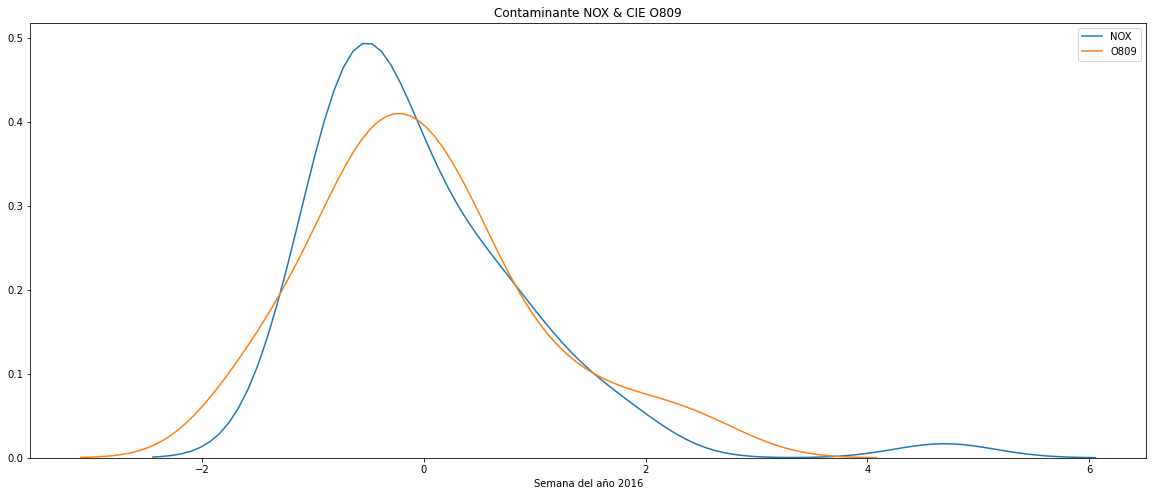


NOX & O800


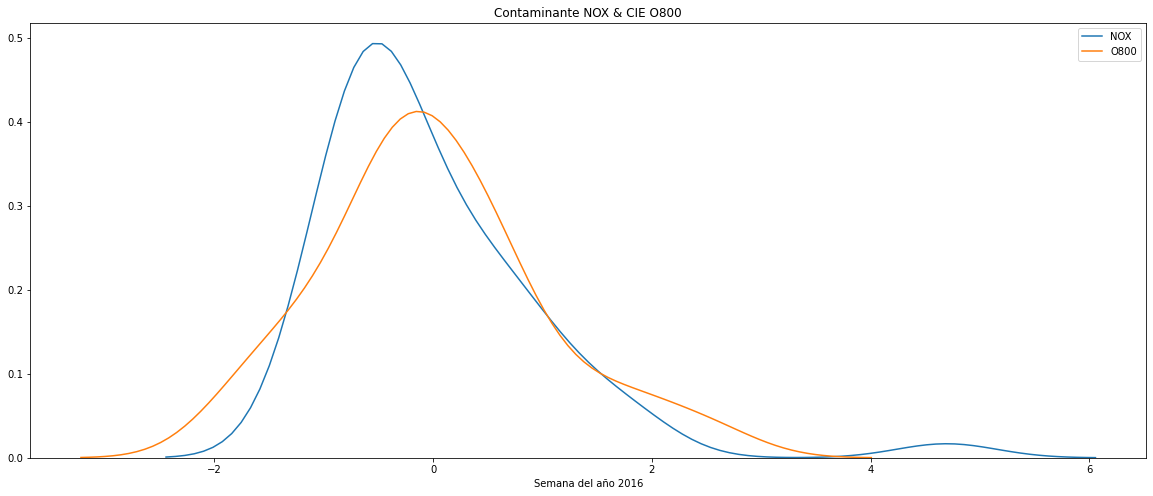


NOX & O829


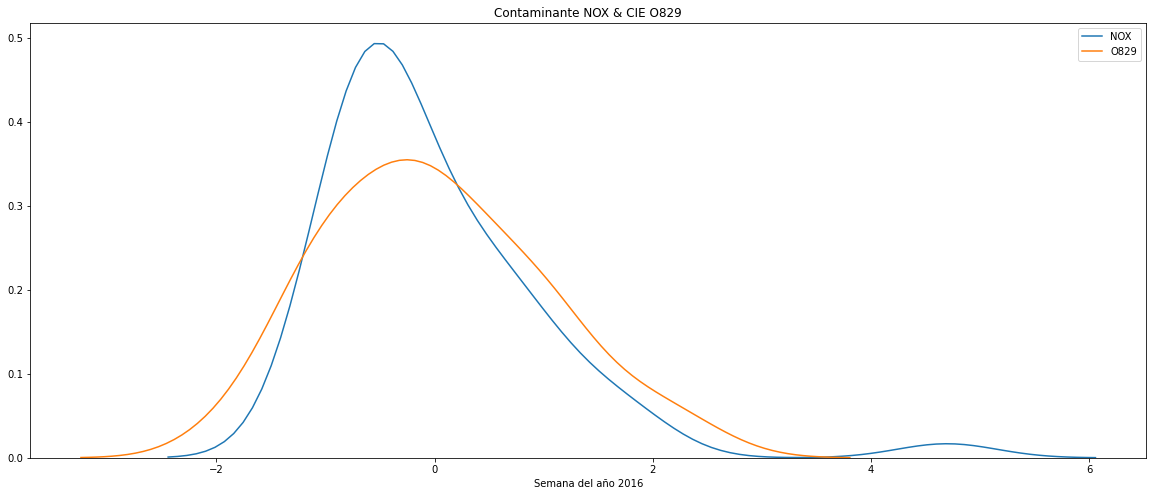


NOX & O064


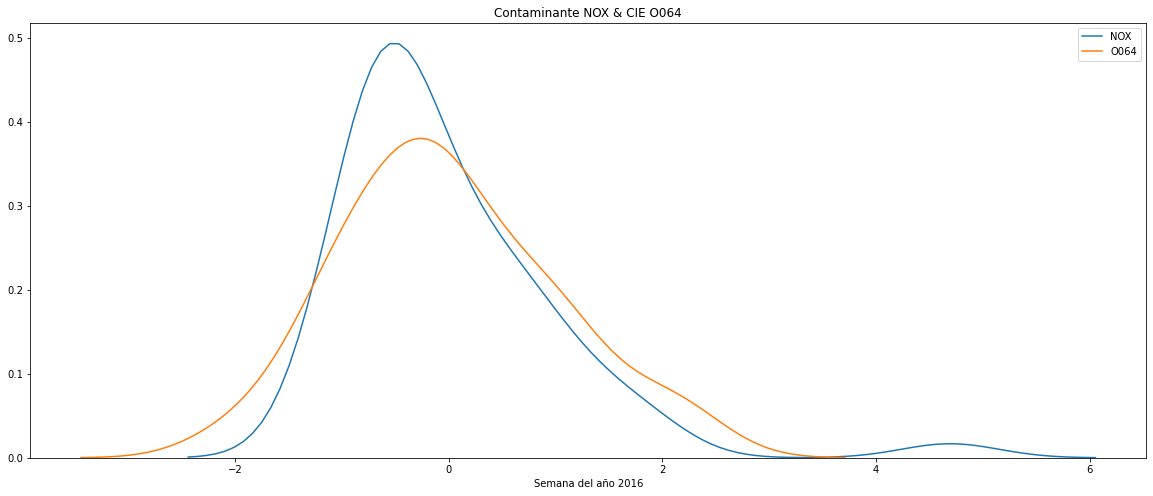


NOX & N189


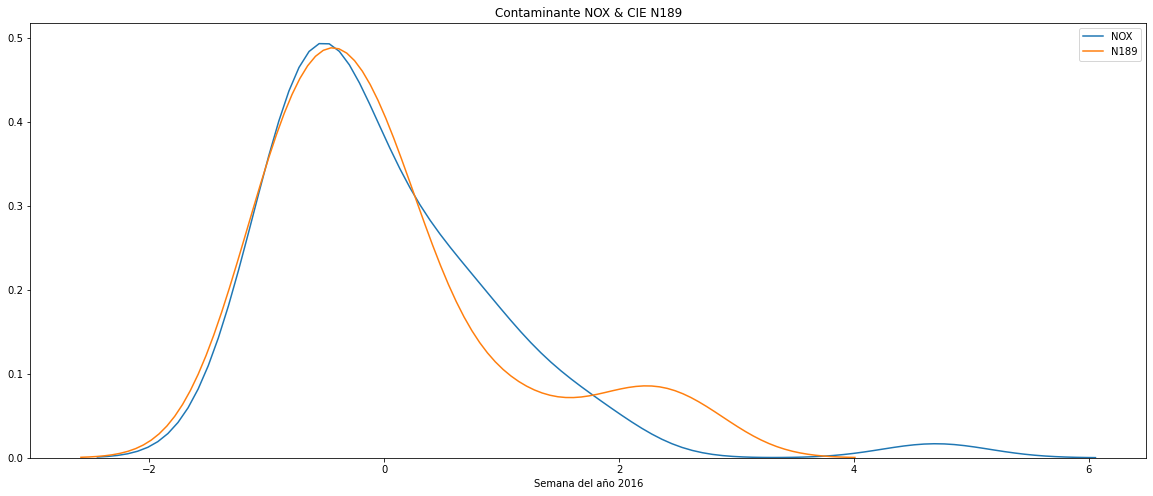


NOX & O342


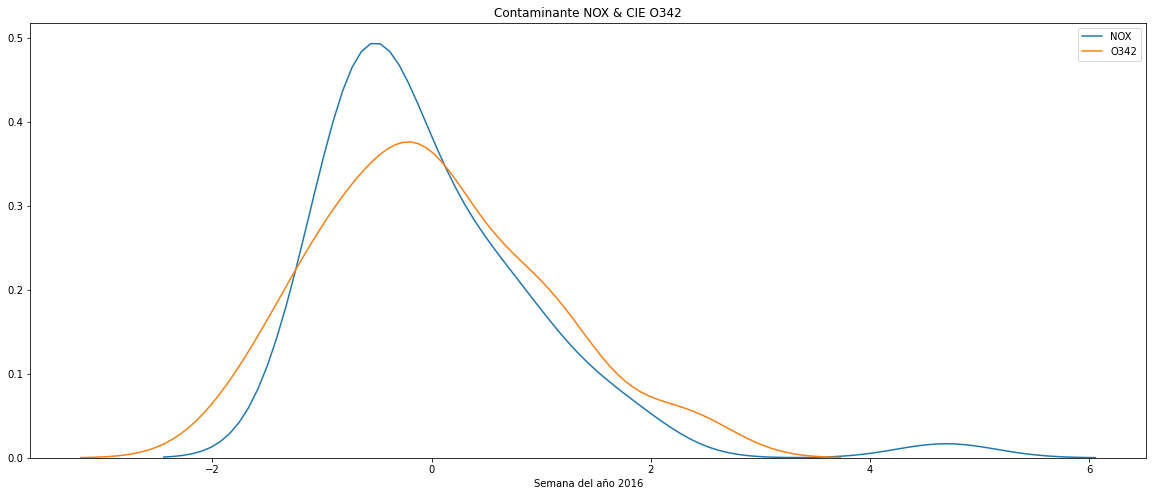


NOX & K358


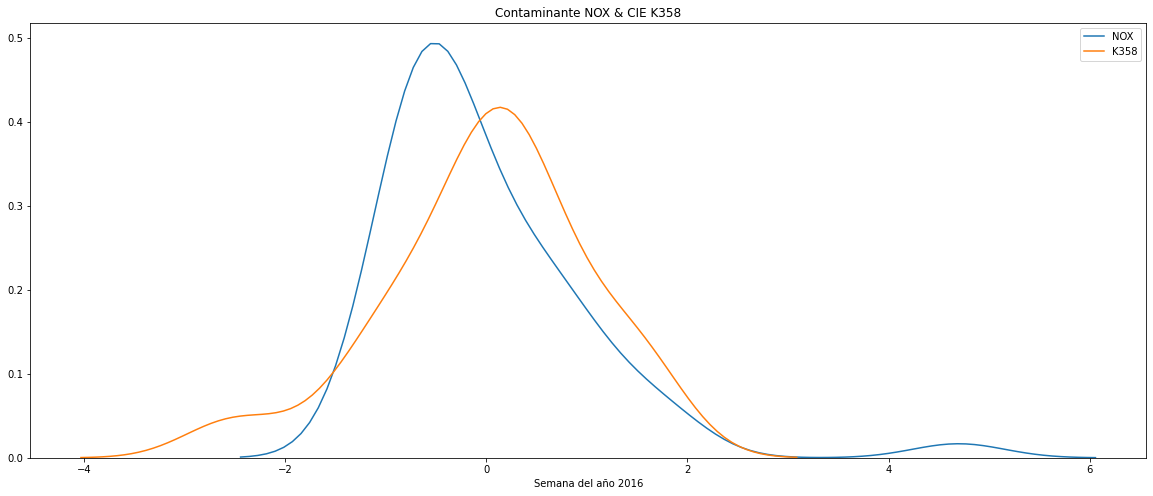


NOX & H


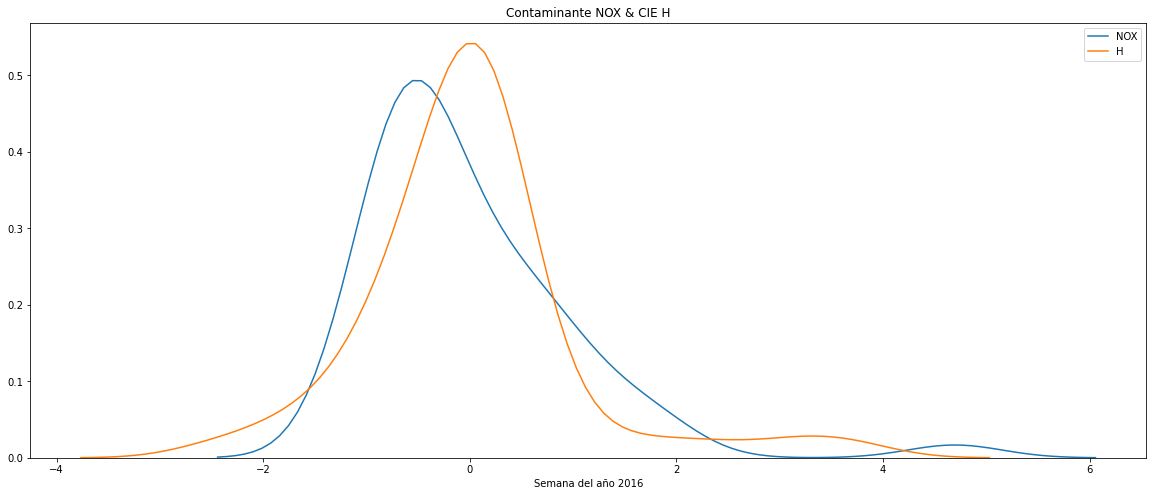


NOX & I


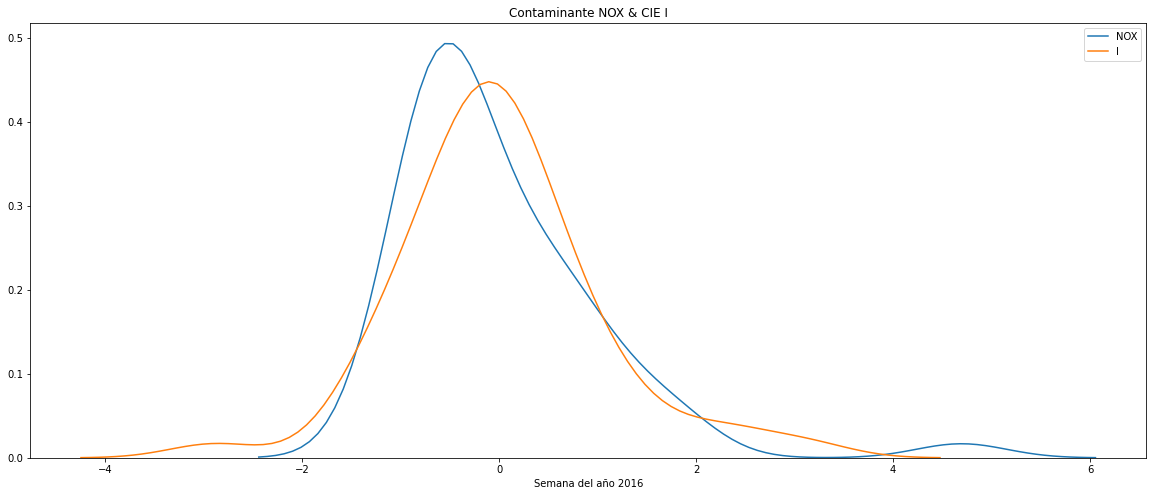


NOX & J


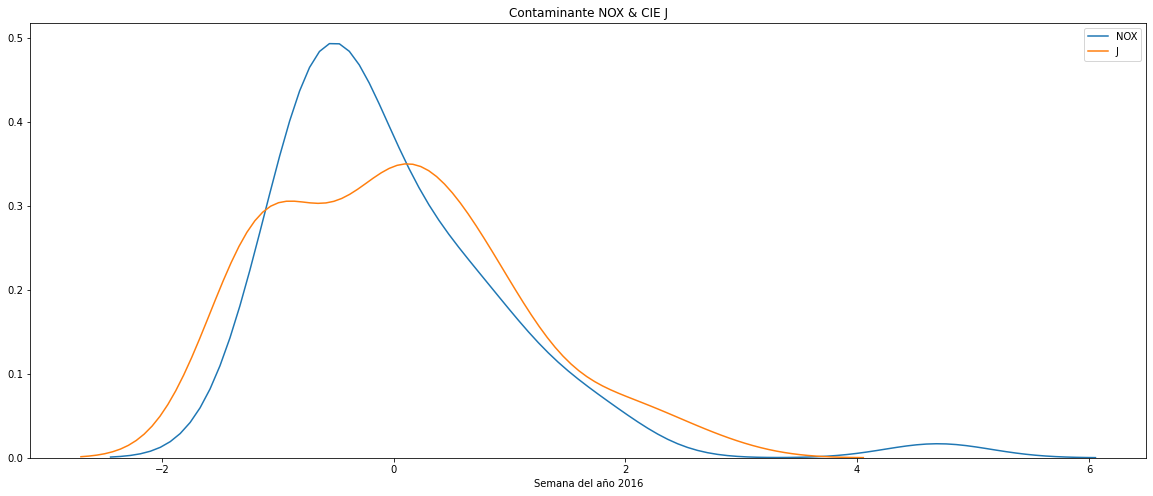

In [58]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2017)

In [59]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp        NOX
0      2017-01-01 00  31.100000
1      2017-01-01 00  12.100000
2      2017-01-01 00  66.400000
3      2017-01-01 00  37.000000
4      2017-01-01 01  20.600000
...              ...        ...
44446  2017-12-31 23  37.000000
44447  2017-12-31 23  17.299999
44448  2017-12-31 23  28.700001
44449  2017-12-31 23  12.000000
44450  2017-12-31 23  16.299999

[44451 rows x 2 columns]

In [60]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp        NOX
0     2017-01-01 00:00:00  31.100000
1     2017-01-01 00:00:00  12.100000
2     2017-01-01 00:00:00  66.400000
3     2017-01-01 00:00:00  37.000000
4     2017-01-01 01:00:00  20.600000
...                   ...        ...
44446 2017-12-31 23:00:00  37.000000
44447 2017-12-31 23:00:00  17.299999
44448 2017-12-31 23:00:00  28.700001
44449 2017-12-31 23:00:00  12.000000
44450 2017-12-31 23:00:00  16.299999

[44451 rows x 2 columns]

In [61]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp        NOX  sem
0     2017-01-01 00:00:00  31.100000    1
1     2017-01-01 00:00:00  12.100000    1
2     2017-01-01 00:00:00  66.400000    1
3     2017-01-01 00:00:00  37.000000    1
4     2017-01-01 01:00:00  20.600000    1
...                   ...        ...  ...
44446 2017-12-31 23:00:00  37.000000    1
44447 2017-12-31 23:00:00  17.299999    1
44448 2017-12-31 23:00:00  28.700001    1
44449 2017-12-31 23:00:00  12.000000    1
44450 2017-12-31 23:00:00  16.299999    1

[44451 rows x 3 columns]

In [62]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums, nrows=1500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2017-02-13 00:00:00     O809
1        2017-03-12 00:00:00     O809
2        2017-04-12 00:00:00     E86X
3        2017-05-13 00:00:00     O809
4        2017-06-14 00:00:00     I219
...                      ...      ...
1499995  2017-08-04 00:00:00     O809
1499996  2017-08-04 00:00:00     O809
1499997  2017-08-04 00:00:00     O064
1499998  2017-08-04 00:00:00     O064
1499999  2017-08-04 00:00:00     O064

[1500000 rows x 2 columns]

In [63]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2017-02-13     O809    7
1       2017-03-12     O809   11
2       2017-04-12     E86X   15
3       2017-05-13     O809   19
4       2017-06-14     I219   24
...            ...      ...  ...
1499995 2017-08-04     O809   31
1499996 2017-08-04     O809   31
1499997 2017-08-04     O064   31
1499998 2017-08-04     O064   31
1499999 2017-08-04     O064   31

[1500000 rows x 3 columns]

In [64]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     29887
2     30924
3     32383
4     32156
5     32001
6     30230
7     32552
8     31518
9     31718
10    32476
11    31829
12    29294
13    29940
14    28557
15    26151
16    26885
17    27700
18    24600
19    26186
20    27410
21    27306
22    26797
23    27708
24    28105
25    27789
26    27284
27    27648
28    27696
29    27579
30    26725
31    27417
32    28836
33    28370
34    28507
35    29005
36    29782
37    30581
38    30630
39    29696
40    30454
41    30531
42    30724
43    30116
44    28700
45    30153
46    30218
47    26720
48    28416
49    28652
50    27196
51    25701
52    20561
Name: sem, dtype: int64

In [65]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1  25.9434
1     2  33.7133
2     3   24.078
3     4  26.9447
4     5  31.3511
5     6  27.9696
6     7  23.0482
7     8  29.3439
8     9   22.264
9    10  23.8078
10   11   23.338
11   12  23.9761
12   13  25.0119
13   14  20.9086
14   15  14.6563
15   16   18.851
16   17  26.9723
17   18  25.1608
18   19  21.0703
19   20  23.4933
20   21  33.4083
21   22  47.9435
22   23  53.8807
23   24  45.2487
24   25  35.5962
25   26  26.0954
26   27  21.4028
27   28  17.7246
28   29  20.5136
29   30  23.6204
30   31  30.7409
31   32  23.0254
32   33  17.5461
33   34  17.5593
34   35   22.419
35   36  28.5387
36   37  37.9794
37   38  28.4491
38   39  38.9406
39   40  40.2575
40   41  37.9533
41   42  28.3236
42   43  27.0248
43   44  37.3155
44   45   39.813
45   46  39.0029
46   47   51.606
47   48  37.9261
48   49  36.4214
49   50   53.491
50   51  55.7622
51   52  37.5264


2017

NOX & O809


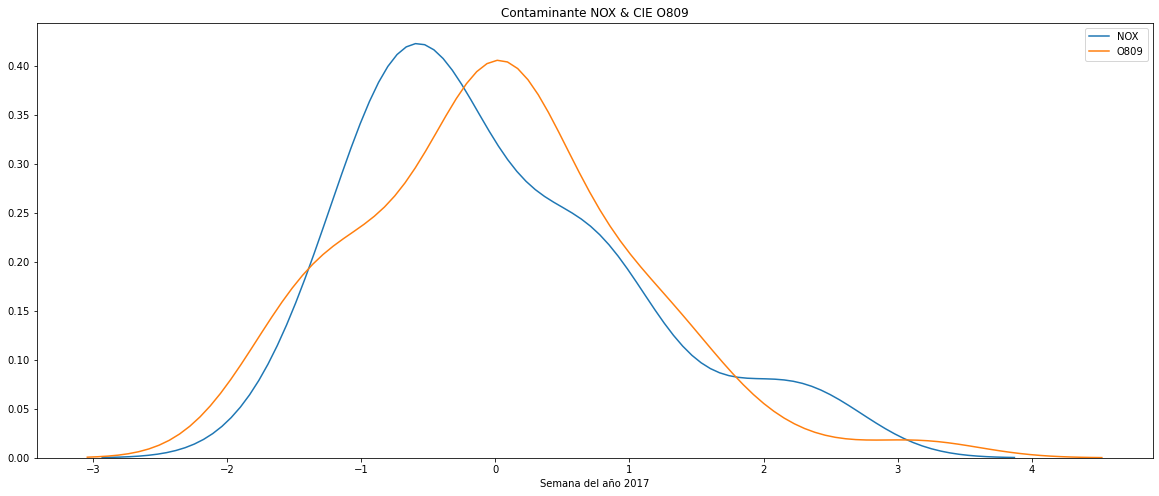


NOX & N189


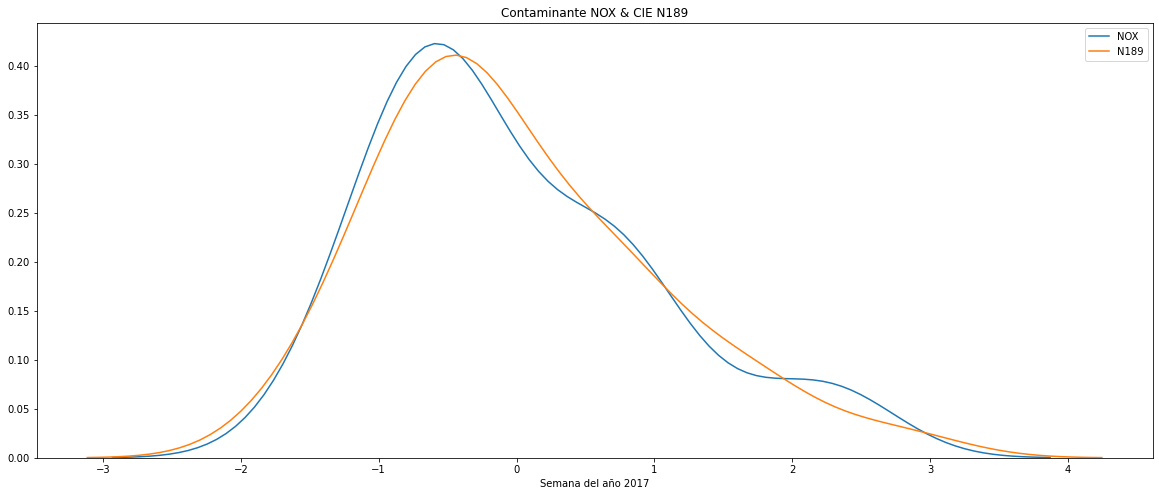


NOX & O800


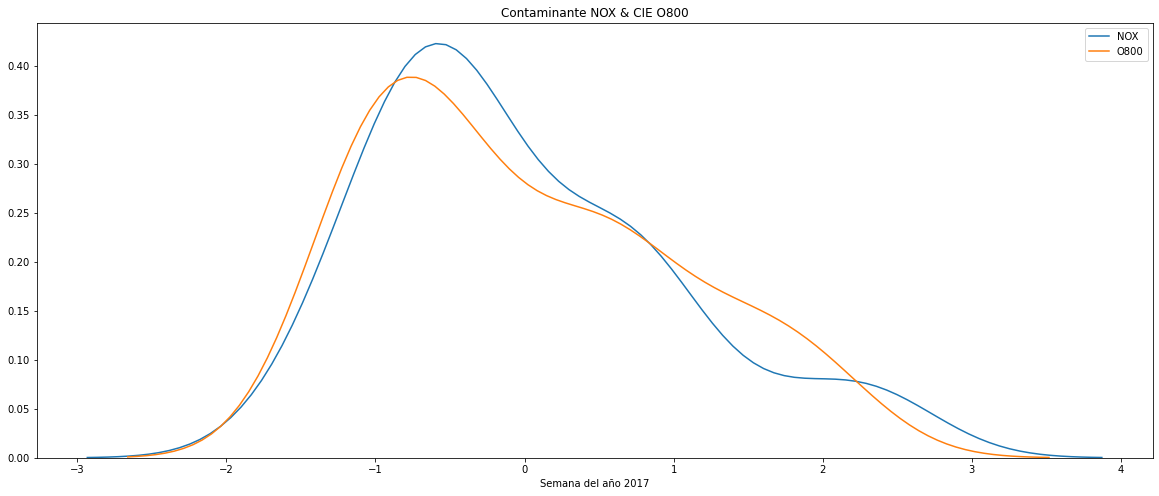


NOX & O829


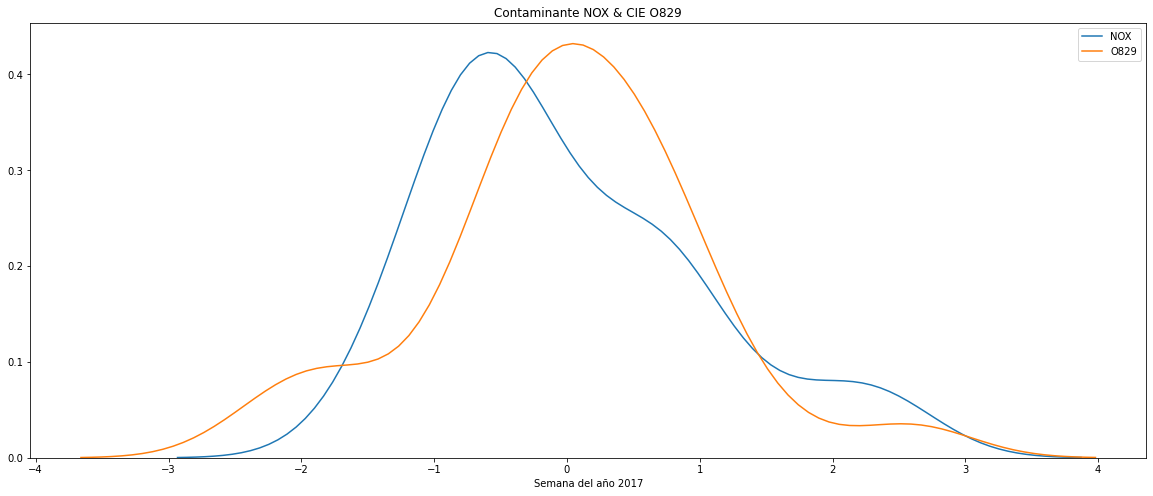


NOX & O064


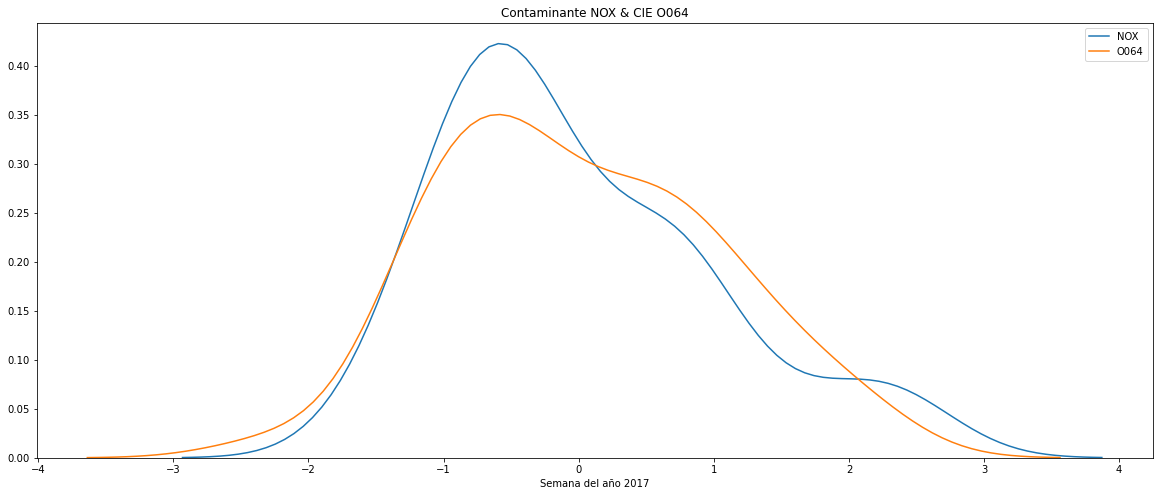


NOX & N185


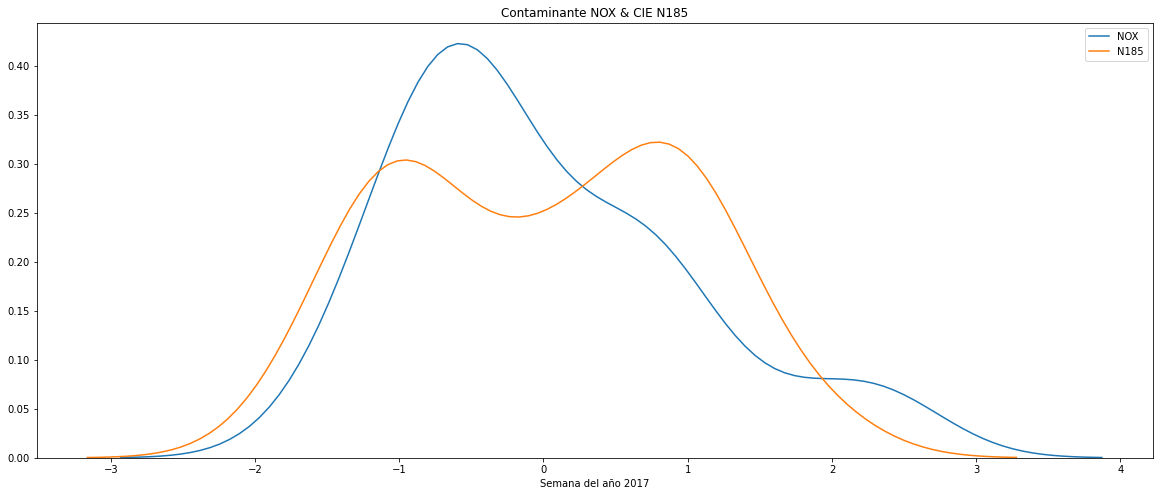


NOX & C509


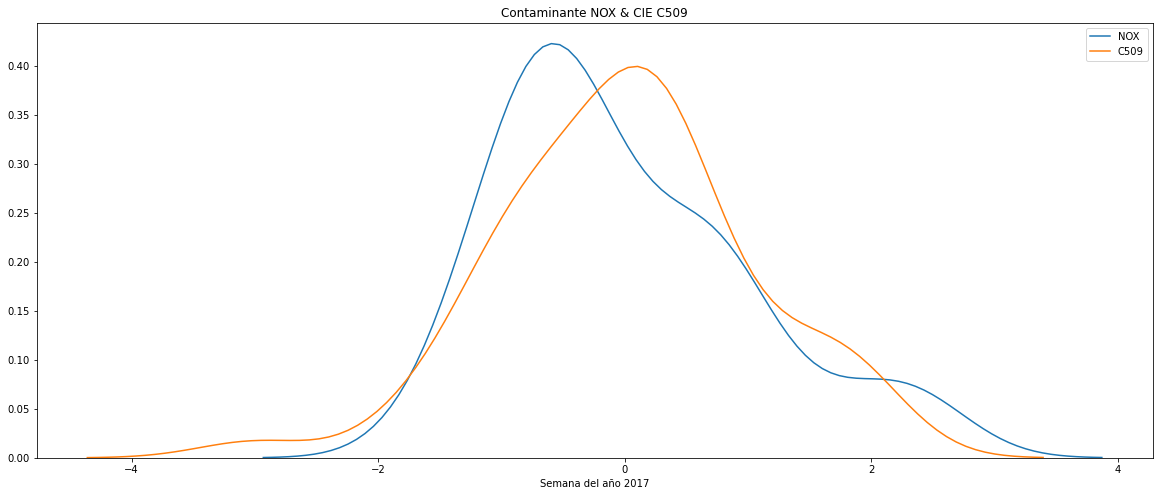


NOX & H


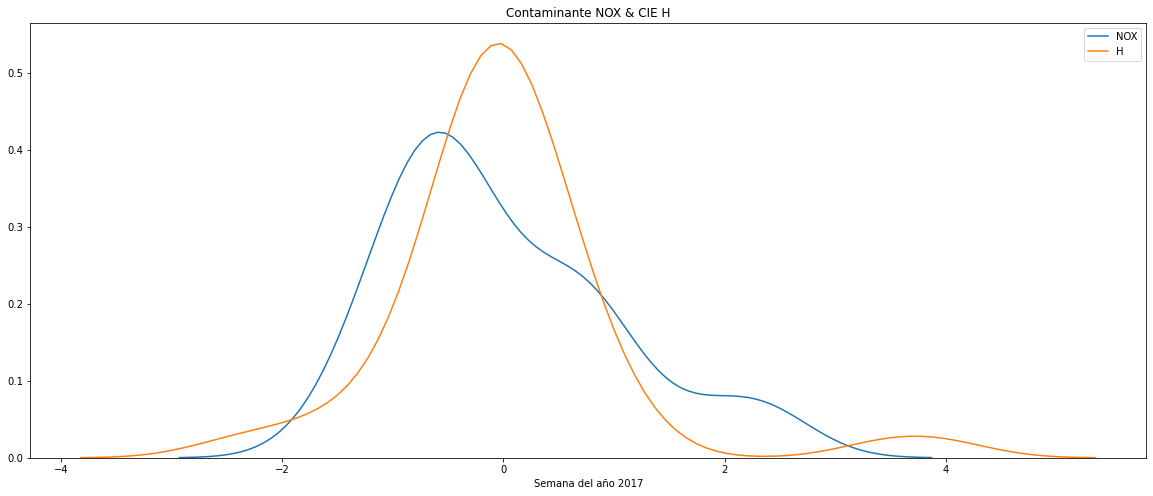


NOX & I


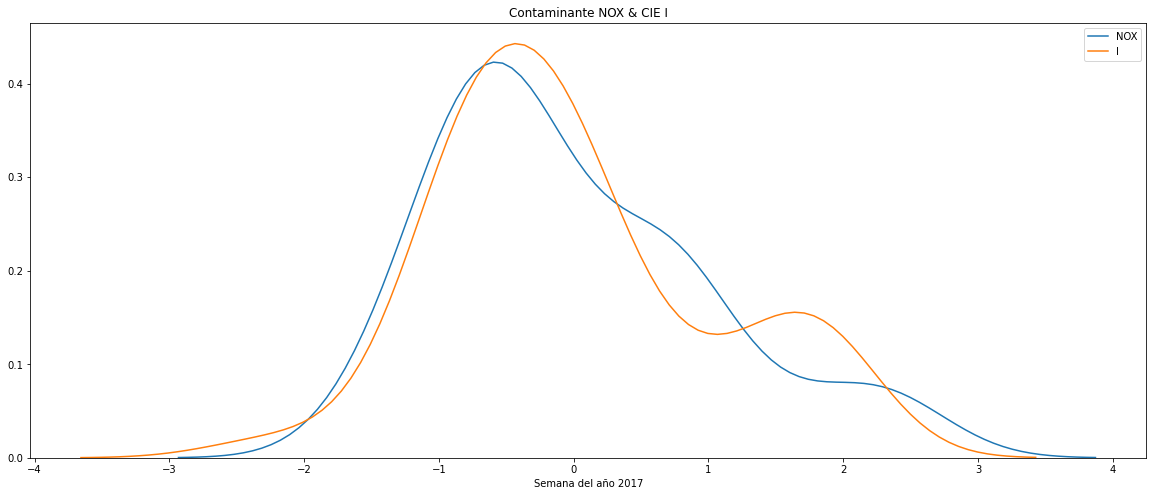


NOX & J


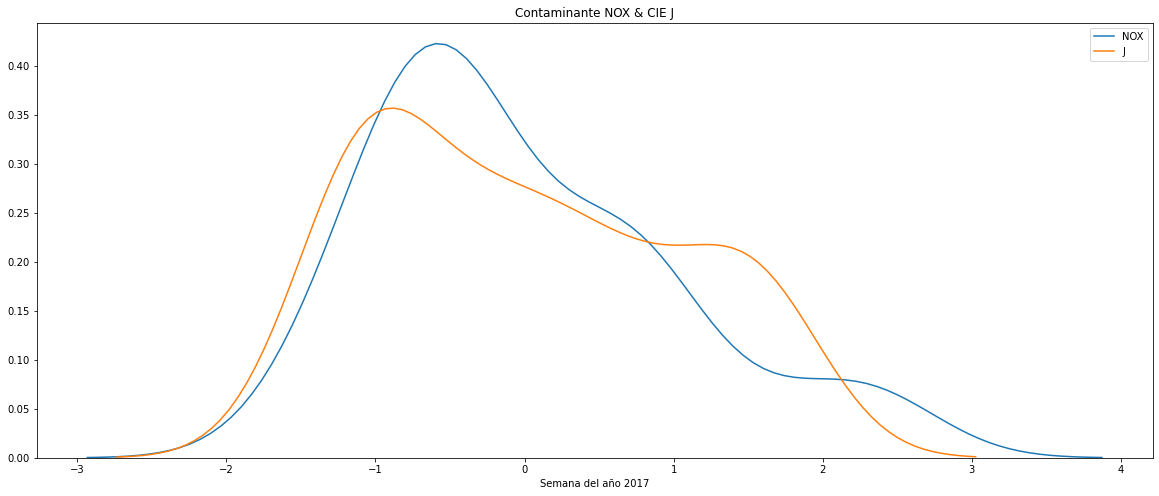

In [66]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2018)

In [67]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp         NOX
0      2018-01-01 01    7.000000
1      2018-01-01 01   42.700000
2      2018-01-01 01    7.000000
3      2018-01-01 01   29.800000
4      2018-01-01 01    8.500000
...              ...         ...
41615  2018-12-31 23   74.400002
41616  2018-12-31 23  207.000000
41617  2018-12-31 23   27.000000
41618  2018-12-31 23   70.099998
41619  2018-12-31 23  185.100006

[41620 rows x 2 columns]

In [68]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp         NOX
0     2018-01-01 01:00:00    7.000000
1     2018-01-01 01:00:00   42.700000
2     2018-01-01 01:00:00    7.000000
3     2018-01-01 01:00:00   29.800000
4     2018-01-01 01:00:00    8.500000
...                   ...         ...
41615 2018-12-31 23:00:00   74.400002
41616 2018-12-31 23:00:00  207.000000
41617 2018-12-31 23:00:00   27.000000
41618 2018-12-31 23:00:00   70.099998
41619 2018-12-31 23:00:00  185.100006

[41620 rows x 2 columns]

In [69]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp         NOX  sem
0     2018-01-01 01:00:00    7.000000    1
1     2018-01-01 01:00:00   42.700000    1
2     2018-01-01 01:00:00    7.000000    1
3     2018-01-01 01:00:00   29.800000    1
4     2018-01-01 01:00:00    8.500000    1
...                   ...         ...  ...
41615 2018-12-31 23:00:00   74.400002    1
41616 2018-12-31 23:00:00  207.000000    1
41617 2018-12-31 23:00:00   27.000000    1
41618 2018-12-31 23:00:00   70.099998    1
41619 2018-12-31 23:00:00  185.100006    1

[41620 rows x 3 columns]

In [70]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=1000000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0       2018-03-11 00:00:00.000     Z524
1       2018-03-15 00:00:00.000     D259
2       2018-04-07 00:00:00.000     M169
3       2018-04-06 00:00:00.000     Q539
4       2018-04-19 00:00:00.000     N185
...                         ...      ...
999995  2018-04-24 00:00:00.000     E042
999996  2018-04-24 00:00:00.000     K802
999997  2018-04-27 00:00:00.000     K603
999998  2018-04-28 00:00:00.000     R69X
999999  2018-04-26 00:00:00.000     M179

[1000000 rows x 2 columns]

In [71]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0      2018-03-11     Z524   11
1      2018-03-15     D259   11
2      2018-04-07     M169   14
3      2018-04-06     Q539   14
4      2018-04-19     N185   16
...           ...      ...  ...
999995 2018-04-24     E042   17
999996 2018-04-24     K802   17
999997 2018-04-27     K603   17
999998 2018-04-28     R69X   17
999999 2018-04-26     M179   17

[1000000 rows x 3 columns]

In [72]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17995
2     18415
3     19382
4     19381
5     19586
6     18117
7     19495
8     19463
9     19664
10    19664
11    20214
12    19257
13    17852
14    18507
15    19268
16    19680
17    19987
18    18283
19    19175
20    19921
21    20048
22    19846
23    19602
24    19141
25    18905
26    18857
27    19181
28    19413
29    19496
30    19698
31    19275
32    19323
33    19547
34    19931
35    19964
36    20534
37    20509
38    20569
39    19922
40    20303
41    19961
42    19705
43    19605
44    18409
45    19046
46    19528
47    17902
48    18747
49    18328
50    18415
51    17870
52    15114
Name: sem, dtype: int64

In [73]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NOX
0     1    42.14
1     2  43.7922
2     3   39.693
3     4  36.6039
4     5  34.3775
5     6  44.2796
6     7   41.696
7     8   37.882
8     9  41.2523
9    10  35.6652
10   11  22.0027
11   12  24.9447
12   13    23.23
13   14  28.3208
14   15  22.8199
15   16  21.4549
16   17  21.3376
17   18  31.1878
18   19  39.0679
19   20  33.5575
20   21    38.47
21   22  19.2886
22   23  18.4584
23   24  17.7908
24   25  25.6953
25   26  22.4266
26   27   24.502
27   28  43.5575
28   29  22.4654
29   30  37.7295
30   31  22.5147
31   32  24.3835
32   33  22.3719
33   34  21.7693
34   35  21.5006
35   36  19.1311
36   37  16.4615
37   38  16.9375
38   39  20.7928
39   40  21.7858
40   41  22.0471
41   42  32.3093
42   43  35.9987
43   44  34.7435
44   45   36.711
45   46   51.558
46   47  47.4646
47   48   60.912
48   49  45.6685
49   50   52.363
50   51  61.9554
51   52  43.5411


2018

NOX & O809


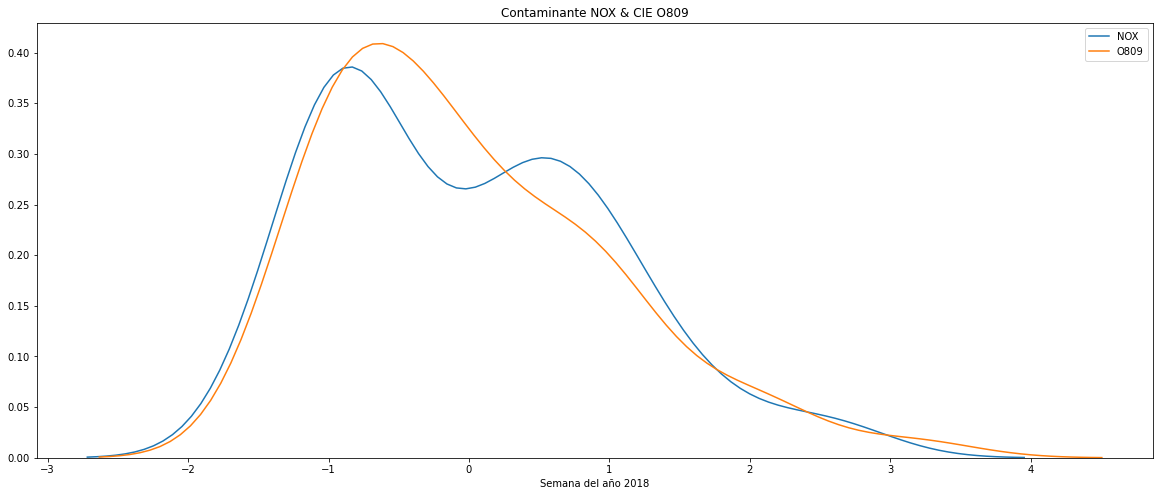


NOX & O800


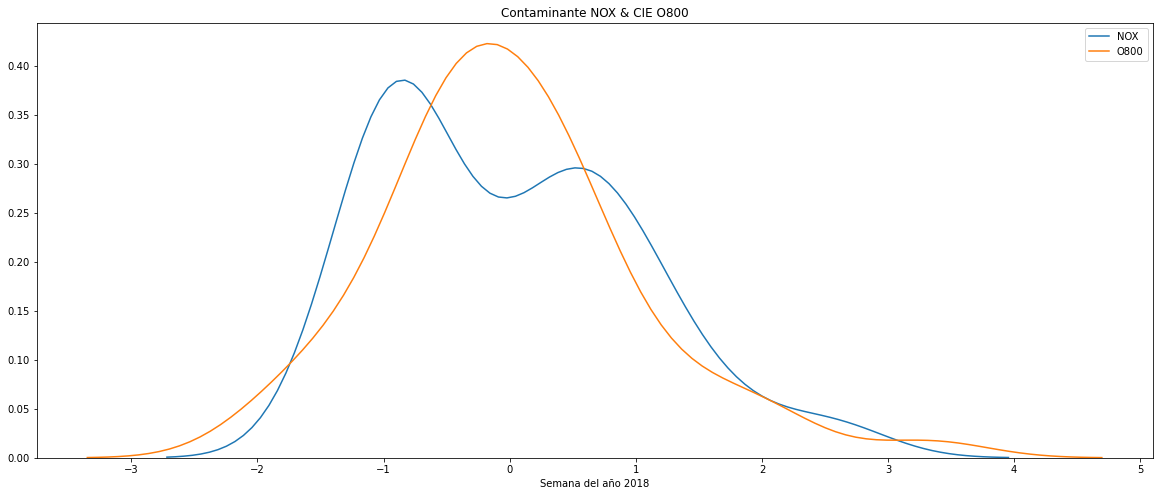


NOX & O829


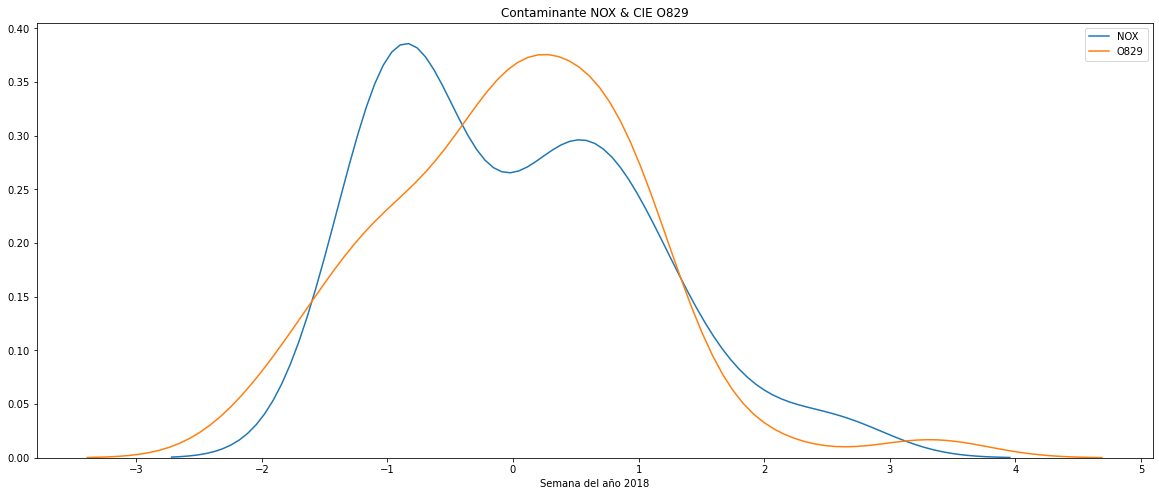


NOX & N189


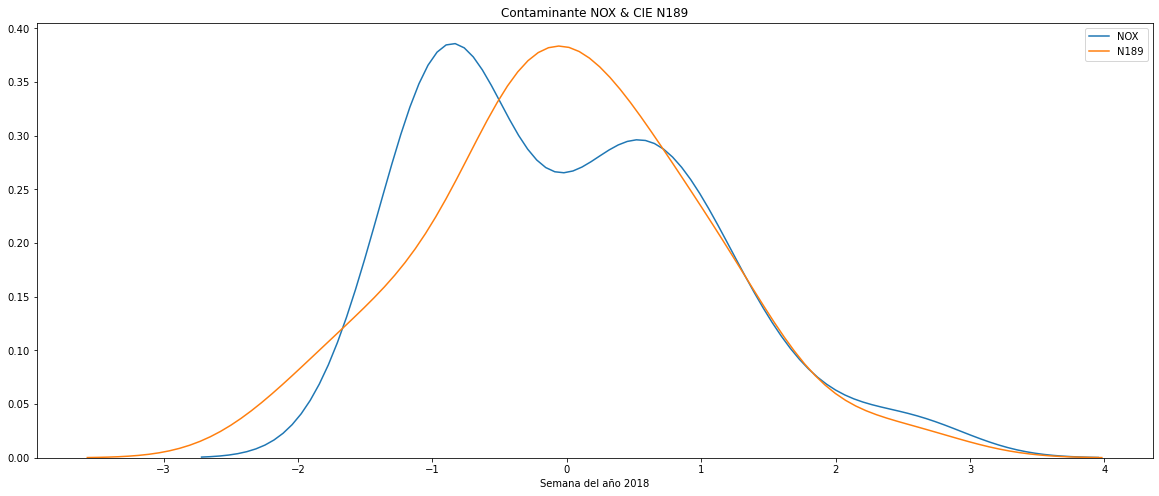


NOX & O064


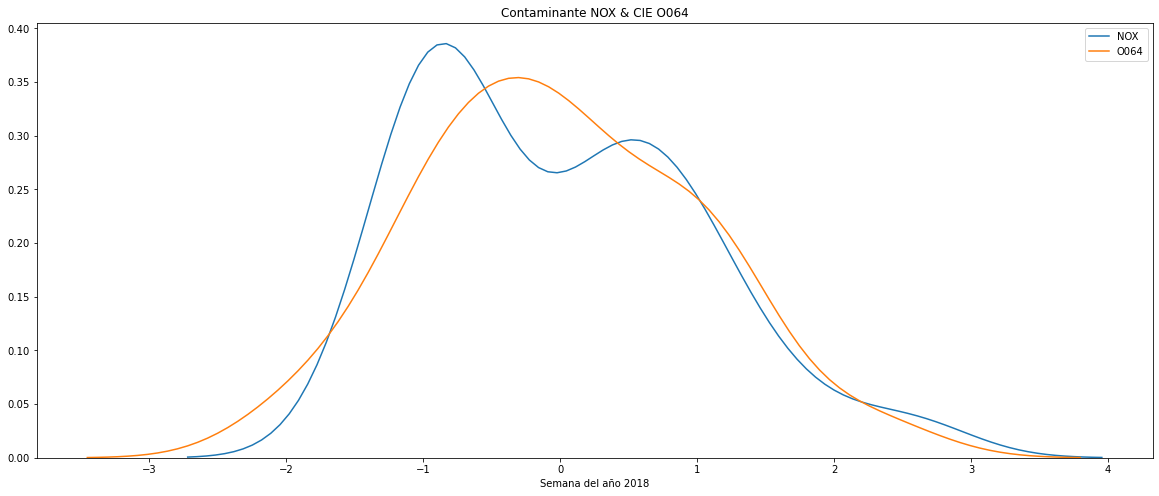


NOX & C509


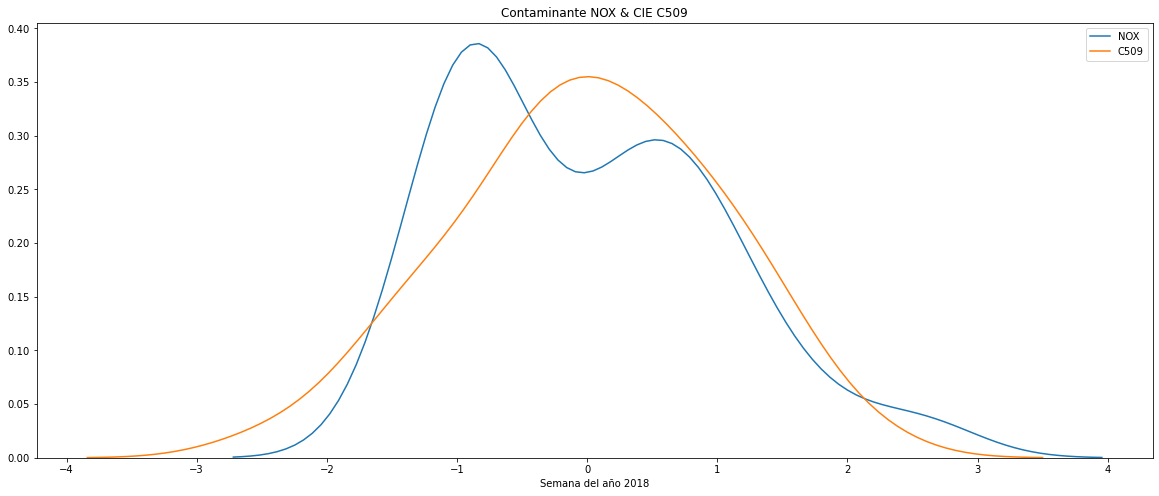


NOX & O342


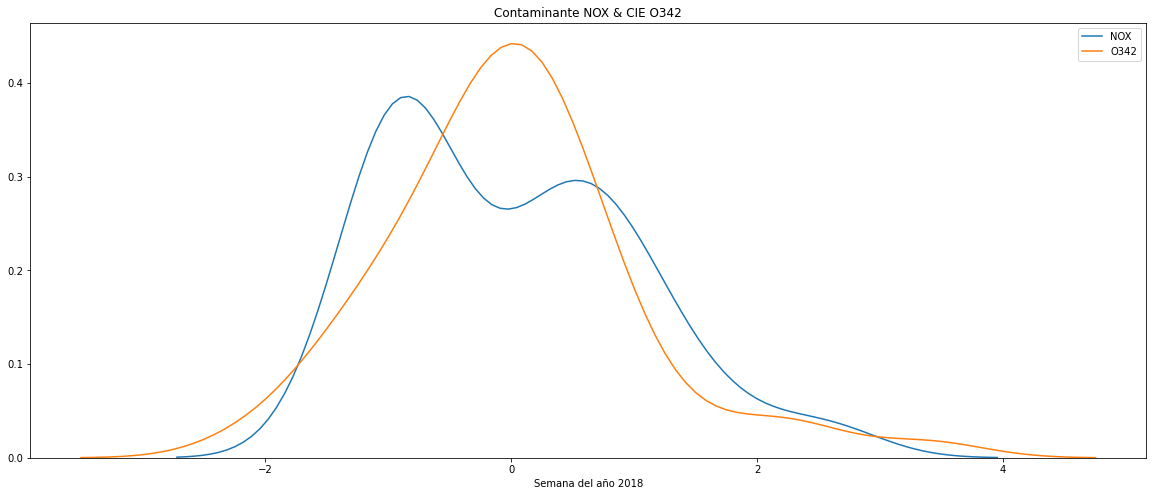


NOX & H


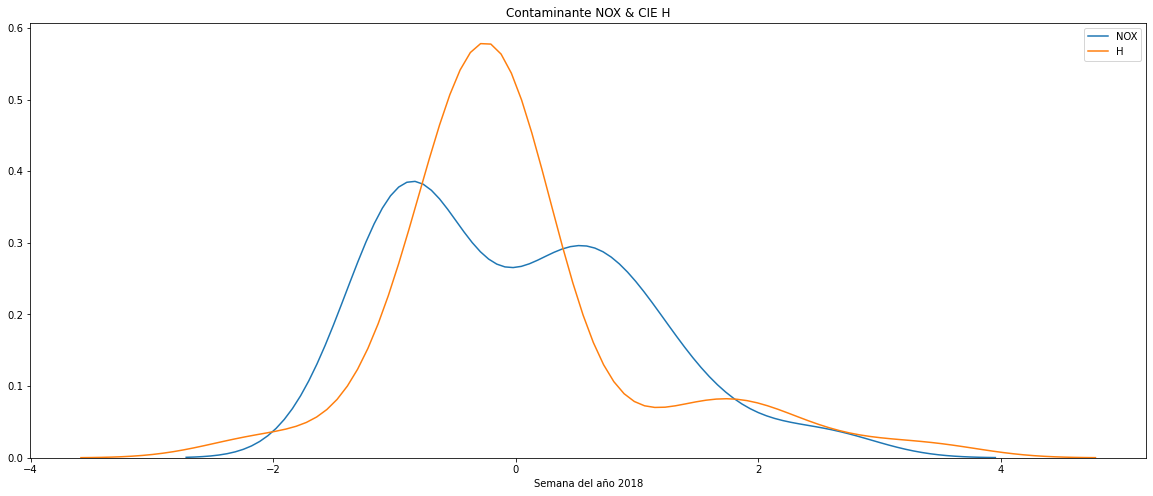


NOX & I


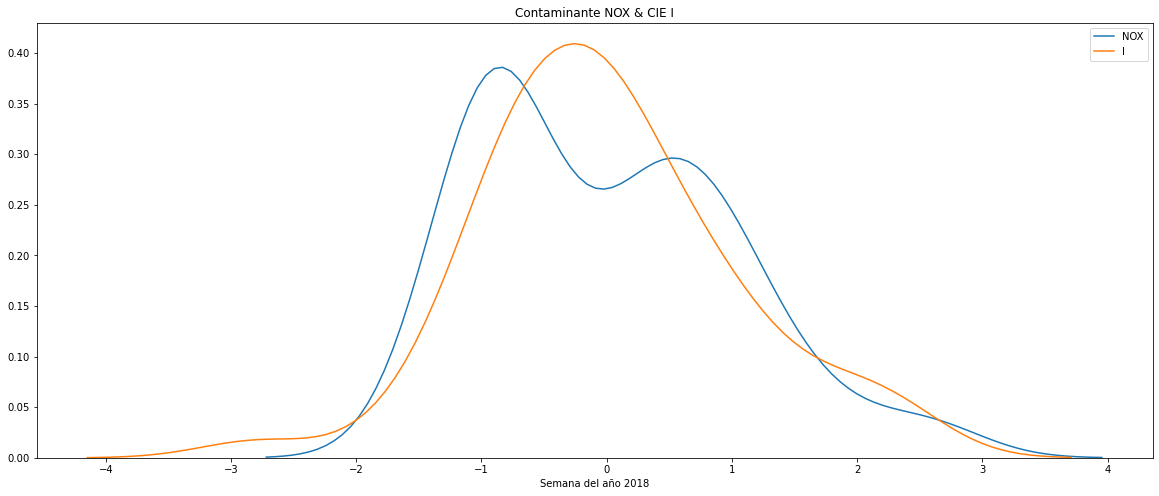


NOX & J


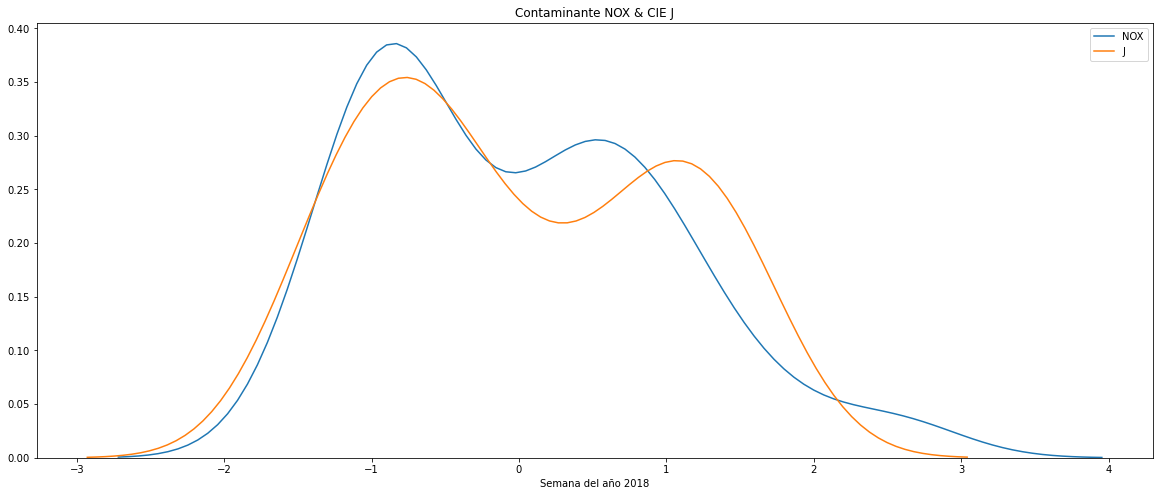

In [74]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1